# DSC 630 Final

# Business Analysis of News Data

In [65]:
#load dataset from ucirepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_news_popularity = fetch_ucirepo(id=332) 
  
# data (as pandas dataframes) 
X = online_news_popularity.data.features 
y = online_news_popularity.data.targets 
  
# metadata 
print(online_news_popularity.metadata) 
  
# variable information 
print(online_news_popularity.variables) 

{'uci_id': 332, 'name': 'Online News Popularity', 'repository_url': 'https://archive.ics.uci.edu/dataset/332/online+news+popularity', 'data_url': 'https://archive.ics.uci.edu/static/public/332/data.csv', 'abstract': 'This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 39797, 'num_features': 58, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': [' shares'], 'index_col': ['url'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2015, 'last_updated': 'Thu Feb 15 2024', 'dataset_doi': '10.24432/C5NS3V', 'creators': ['Kelwin Fernandes', 'Pedro Vinagre', 'Paulo Cortez', 'Pedro Sernadela'], 'intro_paper': {'title': 'A Proactive Intelligent Decision Support System for Predicti

In [289]:
#import packages


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [290]:
#view data summary
X.head(10)

n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   
5             10.0              370.0          0.559889                1.0   
6              8.0              960.0          0.418163                1.0   
7             12.0              989.0          0.433574                1.0   
8             11.0               97.0          0.670103                1.0   
9             10.0              231.0          0.636364                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  \
0                   0.815385         4.0              2.0        1.0   
1                   0.791946         3.0              1.0        1.0   
2                   0.663866         3.0              1.0        1.0   
3                   0.665635         9.0              0.0        1.0   
4                   0.540890        19.0             19.0       20.0   
5                   0.698198         2.0              2.0        0.0   
6                   0.549834        21.0             20.0       20.0   
7                   0.572108        20.0             20.0       20.0   
8                   0.836735         2.0              0.0        0.0   
9                   0.797101         4.0              1.0        1.0   

    num_videos   average_token_length  ...   avg_positive_polarity  \
0          0.0               4.680365  ...                0.378636   
1          0.0               4.913725  ...                0.286915   
2          0.0               4.393365  ...                0.495833   
3          0.0               4.404896  ...                0.385965   
4          0.0               4.682836  ...                0.411127   
5          0.0               4.359459  ...                0.350610   
6          0.0               4.654167  ...                0.402039   
7          0.0               4.617796  ...                0.427720   
8          0.0               4.855670  ...                0.566667   
9          1.0               5.090909  ...                0.298413   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   
5                0.136364                     0.6               -0.195000   
6                0.100000                     1.0               -0.224479   
7                0.100000                     1.0               -0.242778   
8                0.400000                     0.8               -0.125000   
9                0.100000                     0.5               -0.238095   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   
5                  -0.400               -0.100000             0.642857   
6                  -0.500               -0.050000             0.000000   
7                  -0.500               -0.050000             1.000000   
8                  -0.125               -0.125000             0.125

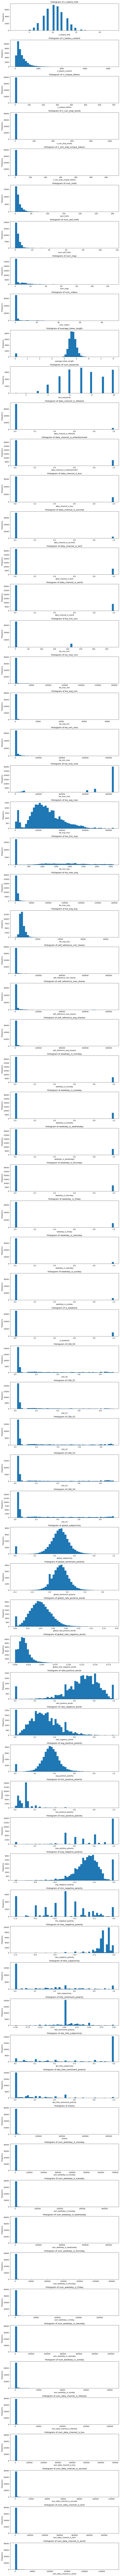

In [307]:


num_columns = df.select_dtypes(include='number').columns
num_plots = len(num_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 3))

for i, col in enumerate(num_columns):
    df[col].plot(kind='hist', bins=50, ax=axes[i], title=f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

<Axes: >

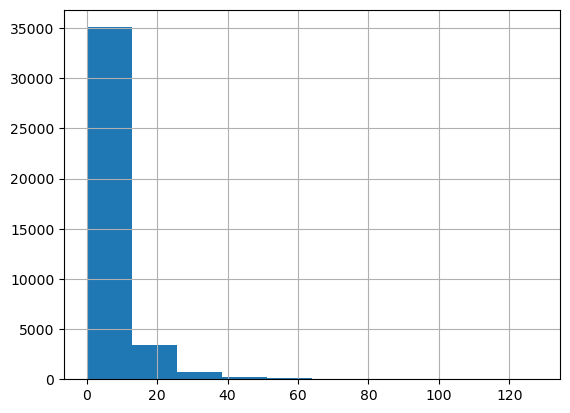

In [308]:
df['num_imgs'].hist()

In [5]:
#view data
y.head(10)

shares
0      593
1      711
2     1500
3     1200
4      505
5      855
6      556
7      891
8     3600
9      710

In [3]:
#load full dataset
z = online_news_popularity.data.original

In [7]:
z.head(10)

url   timedelta  \
0  http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1  http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2  http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3  http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4   http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
5   http://mashable.com/2013/01/07/beewi-smart-toys/       731.0   
6  http://mashable.com/2013/01/07/bodymedia-armba...       731.0   
7   http://mashable.com/2013/01/07/canon-poweshot-n/       731.0   
8  http://mashable.com/2013/01/07/car-of-the-futu...       731.0   
9  http://mashable.com/2013/01/07/chuck-hagel-web...       731.0   

    n_tokens_title   n_tokens_content   n_unique_tokens   n_non_stop_words  \
0             12.0              219.0          0.663594                1.0   
1              9.0              255.0          0.604743                1.0   
2              9.0              211.0          0.575130                1.0   
3              9.0              531.0          0.503788                1.0   
4             13.0             1072.0          0.415646                1.0   
5             10.0              370.0          0.559889                1.0   
6              8.0              960.0          0.418163                1.0   
7             12.0              989.0          0.433574                1.0   
8             11.0               97.0          0.670103                1.0   
9             10.0              231.0          0.636364                1.0   

    n_non_stop_unique_tokens   num_hrefs   num_self_hrefs   num_imgs  ...  \
0                   0.815385         4.0              2.0        1.0  ...   
1                   0.791946         3.0              1.0        1.0  ...   
2                   0.663866         3.0              1.0        1.0  ...   
3                   0.665635         9.0              0.0        1.0  ...   
4                   0.540890        19.0             19.0       20.0  ...   
5                   0.698198         2.0              2.0        0.0  ...   
6                   0.549834        21.0             20.0       20.0  ...   
7                   0.572108        20.0             20.0       20.0  ...   
8                   0.836735         2.0              0.0        0.0  ...   
9                   0.797101         4.0              1.0        1.0  ...   

    min_positive_polarity   max_positive_polarity   avg_negative_polarity  \
0                0.100000                     0.7               -0.350000   
1                0.033333                     0.7               -0.118750   
2                0.100000                     1.0               -0.466667   
3                0.136364                     0.8               -0.369697   
4                0.033333                     1.0               -0.220192   
5                0.136364                     0.6               -0.195000   
6                0.100000                     1.0               -0.224479   
7                0.100000                     1.0               -0.242778   
8                0.400000                     0.8               -0.125000   
9                0.100000                     0.5               -0.238095   

    min_negative_polarity   max_negative_polarity   title_subjectivity  \
0                  -0.600               -0.200000             0.500000   
1                  -0.125               -0.100000             0.000000   
2                  -0.800               -0.133333             0.000000   
3                  -0.600               -0.166667             0.000000   
4                  -0.500               -0.050000             0.454545   
5                  -0.400               -0.100000             0.642857   
6                  -0.500               -0.050000             0.000000   
7                  -0.500               -0.050000             1.000000   
8                  -0.125               -0.125000             0.125000   
9    

In [438]:
#create df with both target and 
df = z.drop(['url',' timedelta'], axis = 'columns')

In [439]:
#the columns all contain a space in their names. Here is a fix
col_names = list(df.columns)

In [440]:
updated_col_names = []
for item in col_names:
    item = item.replace(' ', '')
    updated_col_names.append(item)

In [441]:
df.columns = updated_col_names

In [442]:
df.head(10)

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0            12.0             219.0         0.663594               1.0   
1             9.0             255.0         0.604743               1.0   
2             9.0             211.0         0.575130               1.0   
3             9.0             531.0         0.503788               1.0   
4            13.0            1072.0         0.415646               1.0   
5            10.0             370.0         0.559889               1.0   
6             8.0             960.0         0.418163               1.0   
7            12.0             989.0         0.433574               1.0   
8            11.0              97.0         0.670103               1.0   
9            10.0             231.0         0.636364               1.0   

   n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  num_videos  \
0                  0.815385        4.0             2.0       1.0         0.0   
1                  0.791946        3.0             1.0       1.0         0.0   
2                  0.663866        3.0             1.0       1.0         0.0   
3                  0.665635        9.0             0.0       1.0         0.0   
4                  0.540890       19.0            19.0      20.0         0.0   
5                  0.698198        2.0             2.0       0.0         0.0   
6                  0.549834       21.0            20.0      20.0         0.0   
7                  0.572108       20.0            20.0      20.0         0.0   
8                  0.836735        2.0             0.0       0.0         0.0   
9                  0.797101        4.0             1.0       1.0         1.0   

   average_token_length  ...  min_positive_polarity  max_positive_polarity  \
0              4.680365  ...               0.100000                    0.7   
1              4.913725  ...               0.033333                    0.7   
2              4.393365  ...               0.100000                    1.0   
3              4.404896  ...               0.136364                    0.8   
4              4.682836  ...               0.033333                    1.0   
5              4.359459  ...               0.136364                    0.6   
6              4.654167  ...               0.100000                    1.0   
7              4.617796  ...               0.100000                    1.0   
8              4.855670  ...               0.400000                    0.8   
9              5.090909  ...               0.100000                    0.5   

   avg_negative_polarity  min_negative_polarity  max_negative_polarity  \
0              -0.350000                 -0.600              -0.200000   
1              -0.118750                 -0.125              -0.100000   
2              -0.466667                 -0.800              -0.133333   
3              -0.369697                 -0.600              -0.166667   
4              -0.220192                 -0.500              -0.050000   
5              -0.195000                 -0.400              -0.100000   
6              -0.224479                 -0.500              -0.050000   
7              -0.242778                 -0.500              -0.050000   
8              -0.125000                 -0.125              -0.125000   
9              -0.238095                 -0.500              -0.100000   

   title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0            0.500000                 -0.187500                0.000000   
1            0.000000                  0.000000                0.500000   
2            0.000000                  0.000000                0.500000   
3            0.000000                  0.000000                0.500000   
4            0.454545                  0.136364                0.045455   
5            0.642857                  0.214286                0.142857   
6            0.000000                  0.000000                0.500000   
7            1.000000            

In [443]:
for day in week_columns:
    df['sum_{}'.format(day)] = df[day] * df['shares']

In [444]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [445]:
views_by_day = {
    'Monday': df['sum_weekday_is_monday'].sum(),
    'Tuesday': df['sum_weekday_is_tuesday'].sum(),
    'Wednesday': df['sum_weekday_is_wednesday'].sum(),
    'Thursday': df['sum_weekday_is_thursday'].sum(),
    'Friday': df['sum_weekday_is_friday'].sum(),
    'Saturday':df['sum_weekday_is_saturday'].sum(),
    'Sunday': df['sum_weekday_is_sunday'].sum()
}

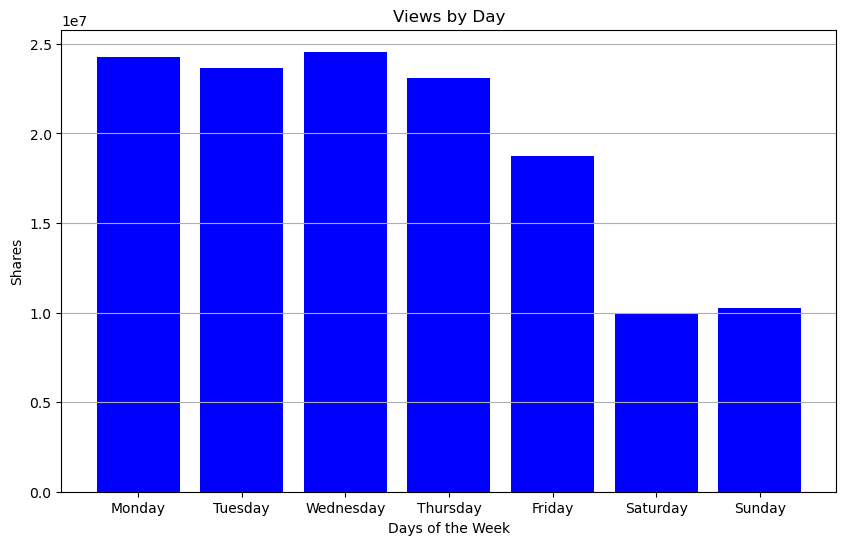

In [332]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(views_by_day.keys(), views_by_day.values(), color='blue')  # Create a bar chart
plt.title('Views by Day')  # Add a title
plt.xlabel('Days of the Week')  # Label x-axis
plt.ylabel('Shares')  # Label y-axis
plt.grid(axis='y')  # Show grid lines on the y-axis
plt.show()  # Display the plot

In [154]:
def create_scatterplot(x, y):
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.scatter(x, y, c='blue', marker='o')  # Create a scatterplot with blue circles
    plt.title('Scatter Plot')  # Add a title
    plt.xlabel('x')  # Label x-axis
    plt.ylabel('Shares')  # Label y-axis
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot

In [136]:
def create_barchart(x, y):
    plt.figure(figsize=(8, 6))  # Set the figure size
    plt.bar(x, y, color='blue')  # Create a bar chart with blue bars
    plt.title('Bar Chart of x vs y')  # Add a title
    plt.xlabel('x')  # Label x-axis
    plt.ylabel('y')  # Label y-axis
    plt.grid(axis='y')  # Show grid lines on the y-axis
    plt.show()  # Display the plot

In [141]:
len(df['weekday_is_monday'].unique()) == 2

True

n_tokens_title


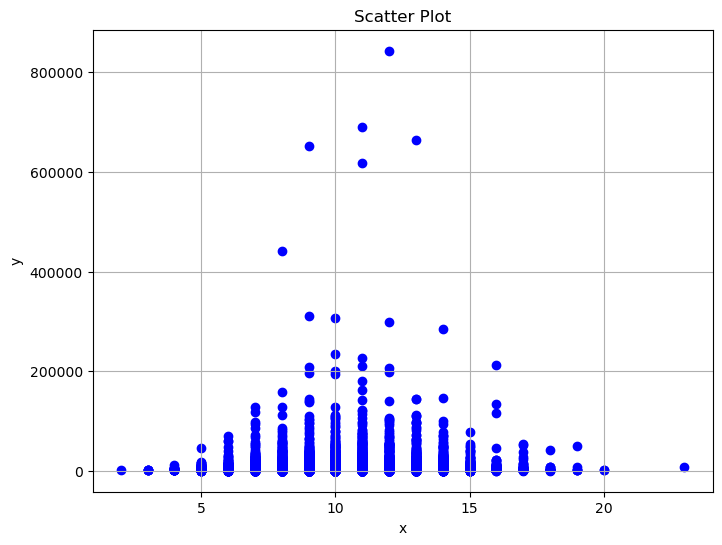

n_tokens_content


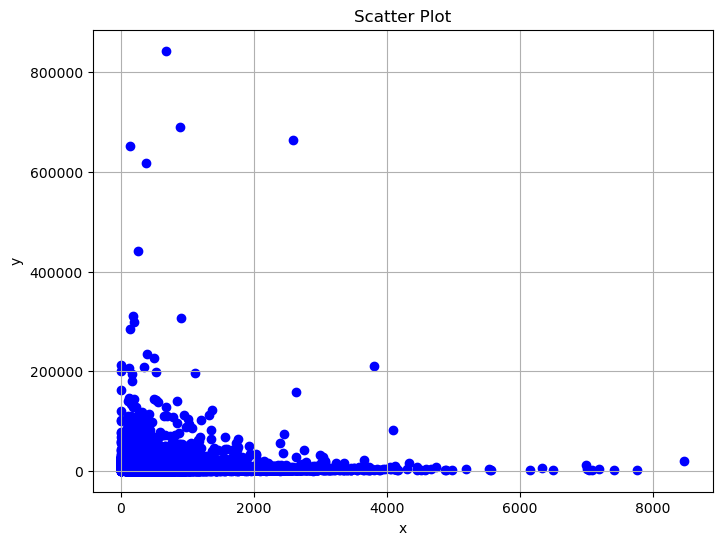

n_unique_tokens


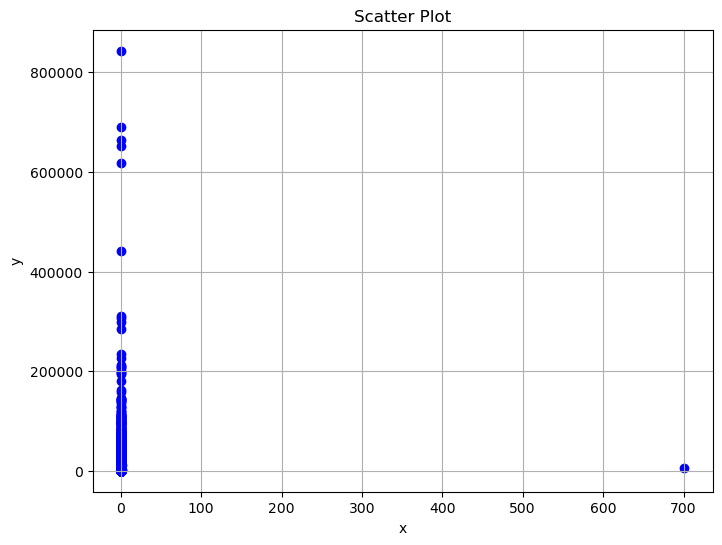

n_non_stop_words


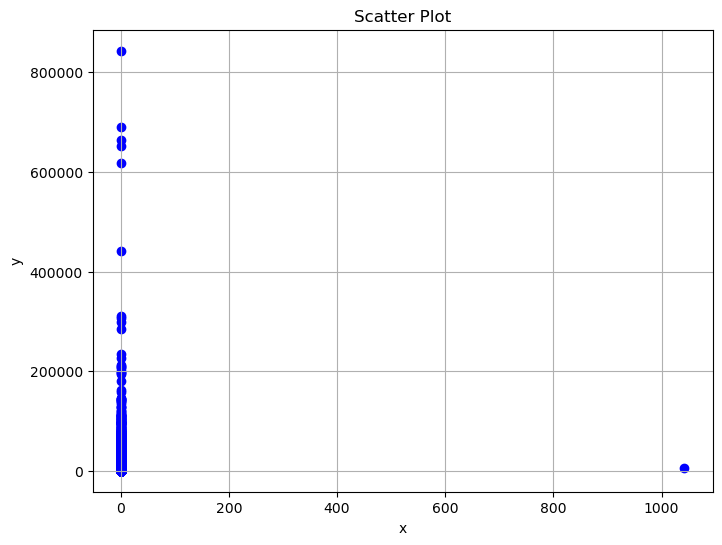

n_non_stop_unique_tokens


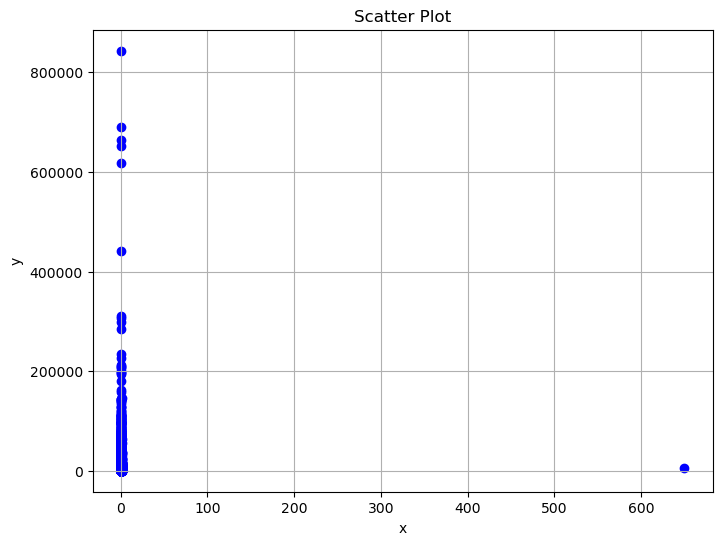

num_hrefs


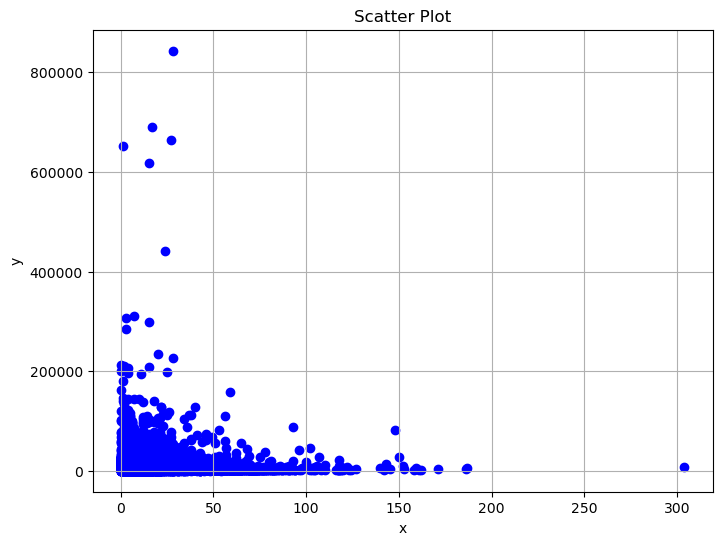

num_self_hrefs


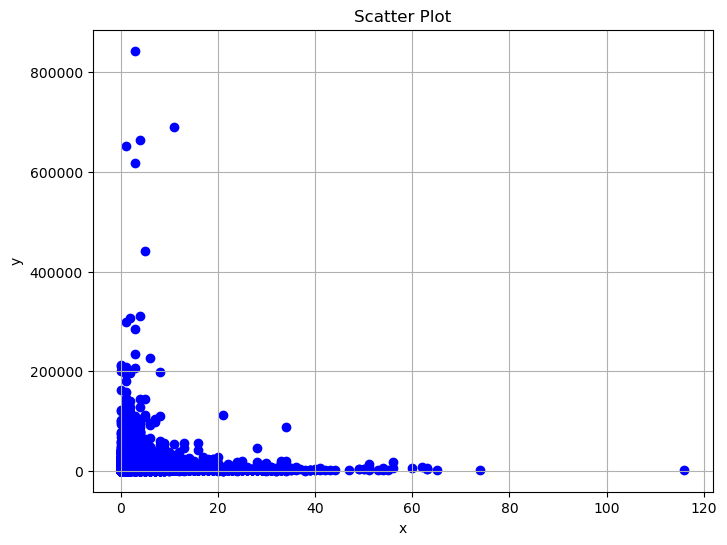

num_imgs


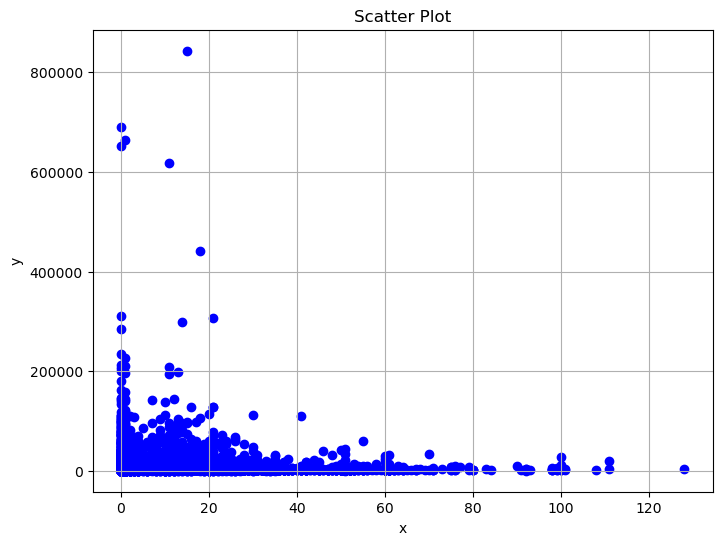

num_videos


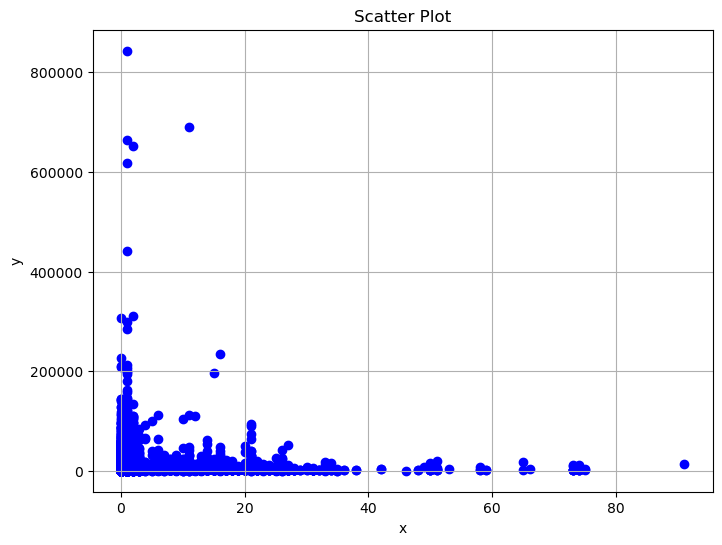

average_token_length


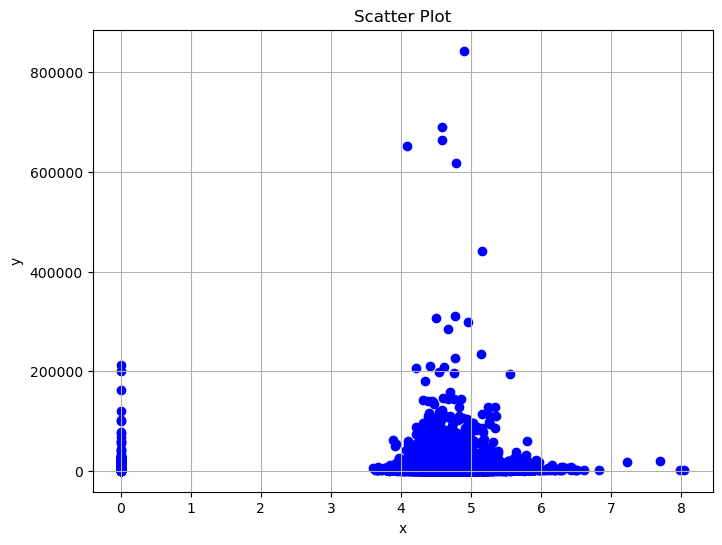

num_keywords


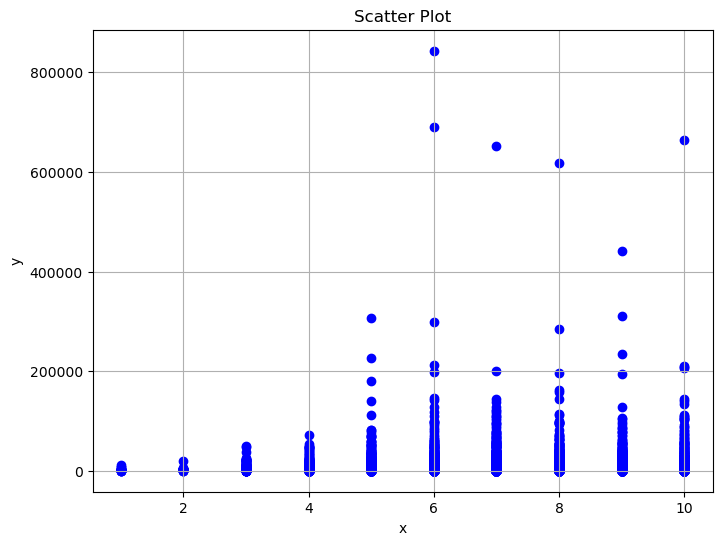

kw_min_min


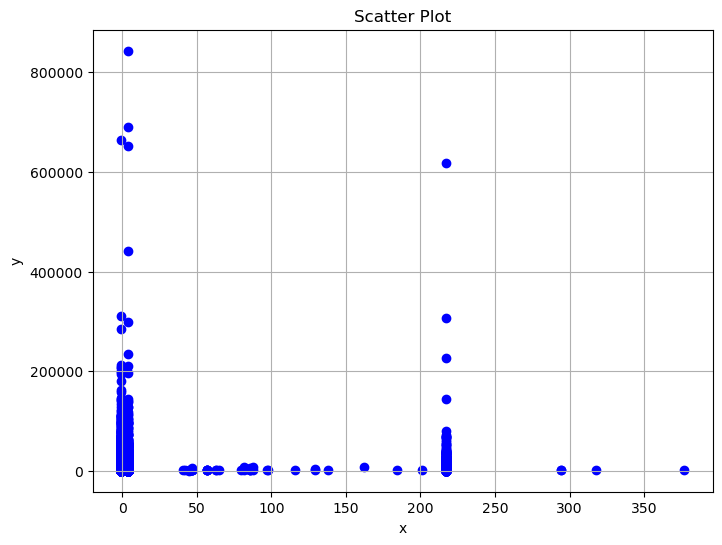

kw_max_min


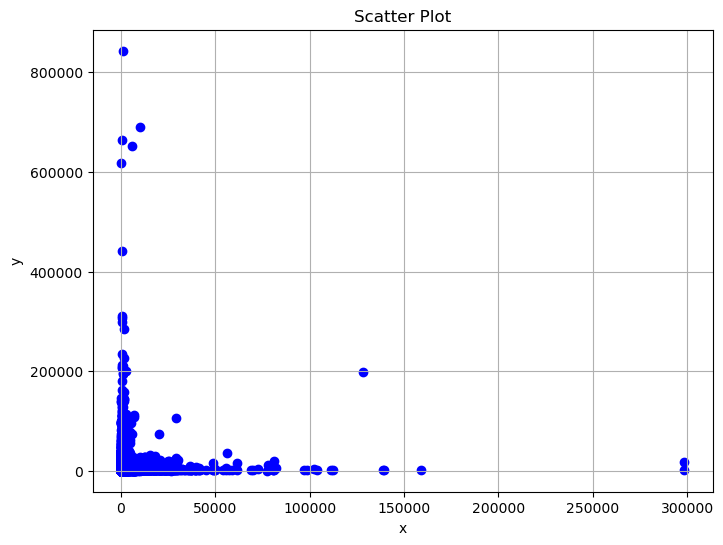

kw_avg_min


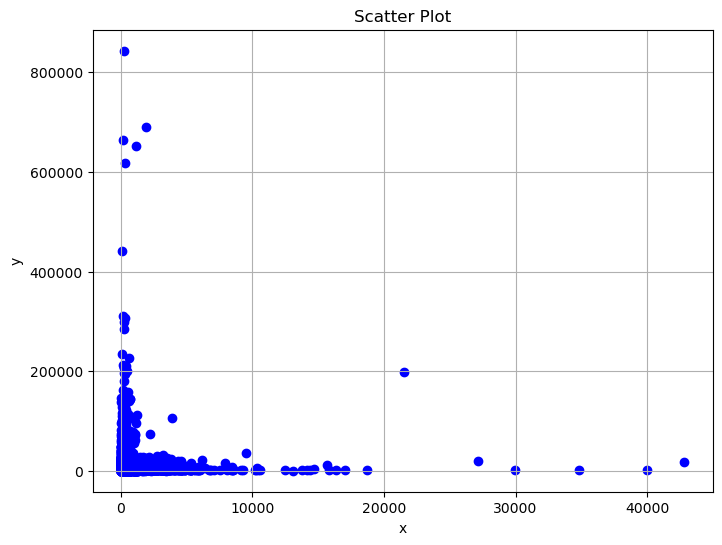

kw_min_max


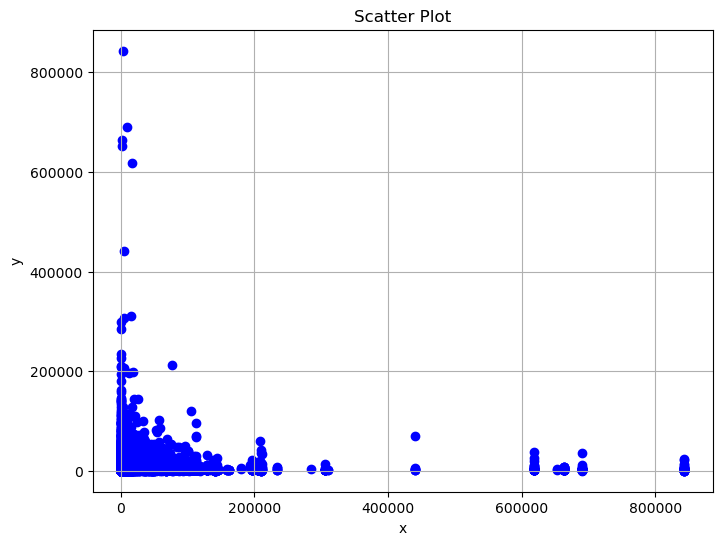

kw_max_max


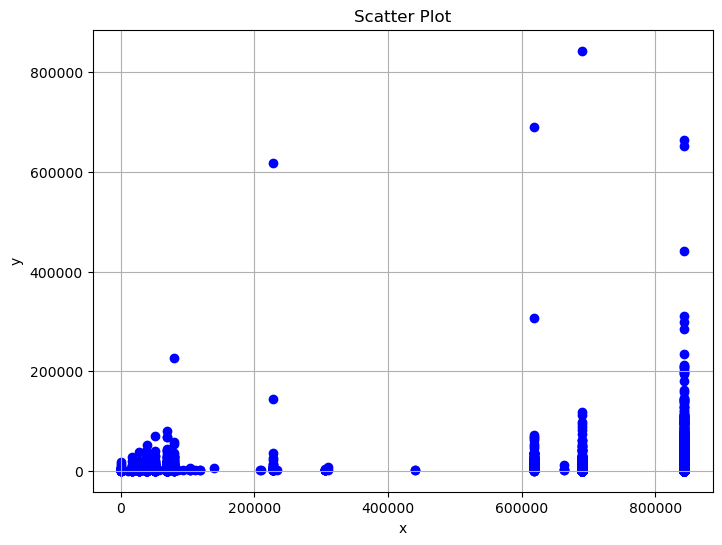

kw_avg_max


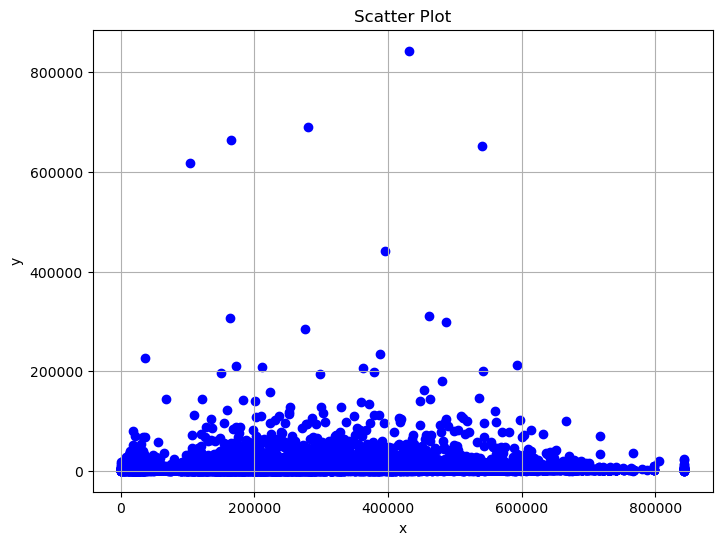

kw_min_avg


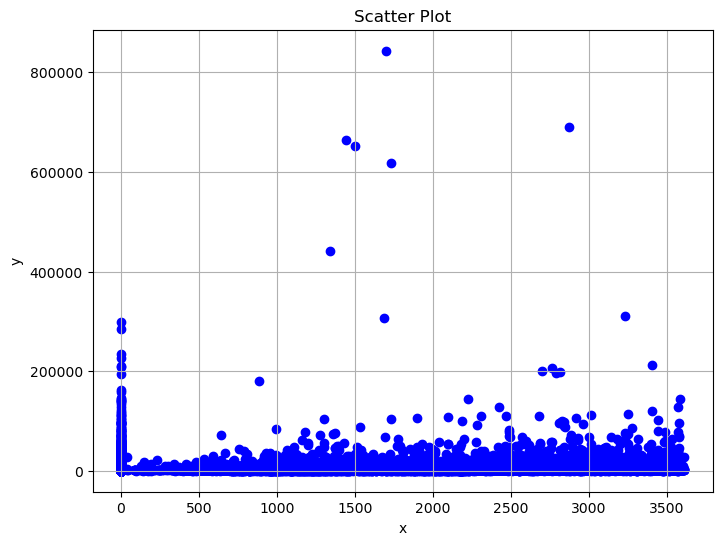

kw_max_avg


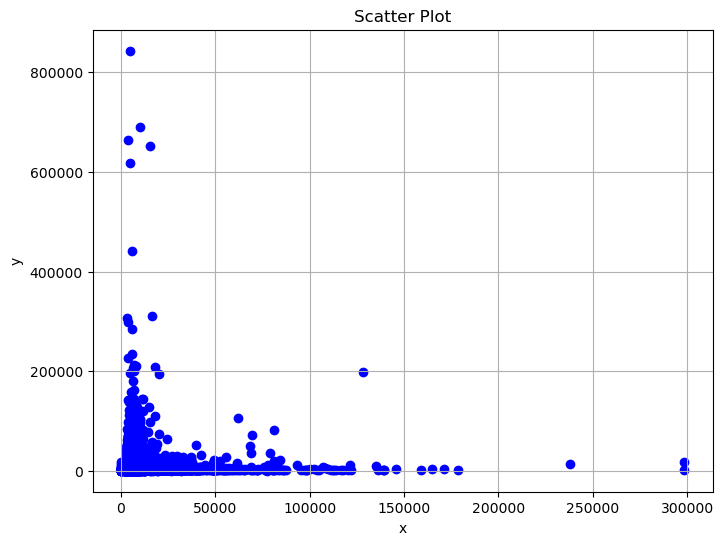

kw_avg_avg


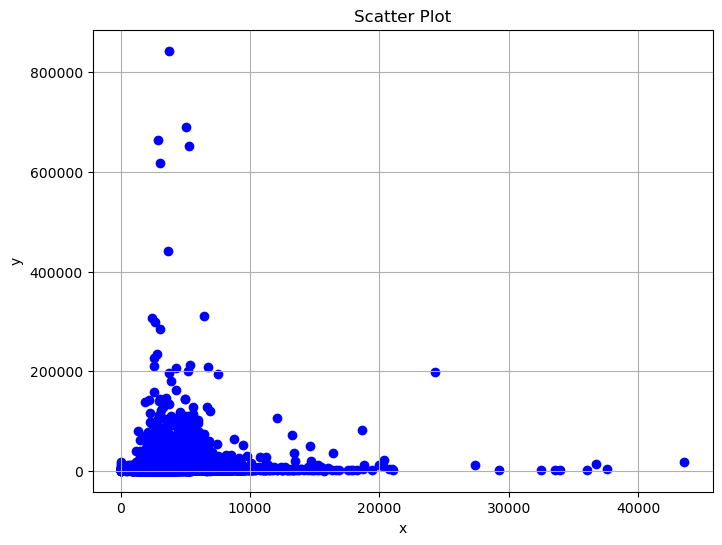

self_reference_min_shares


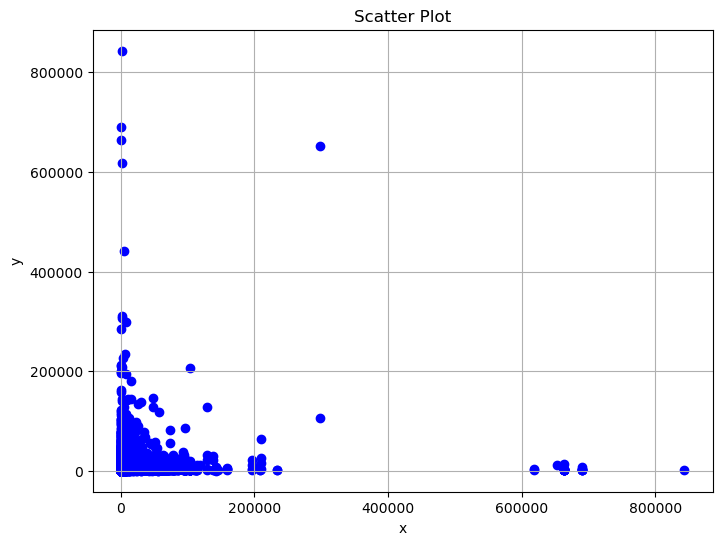

self_reference_max_shares


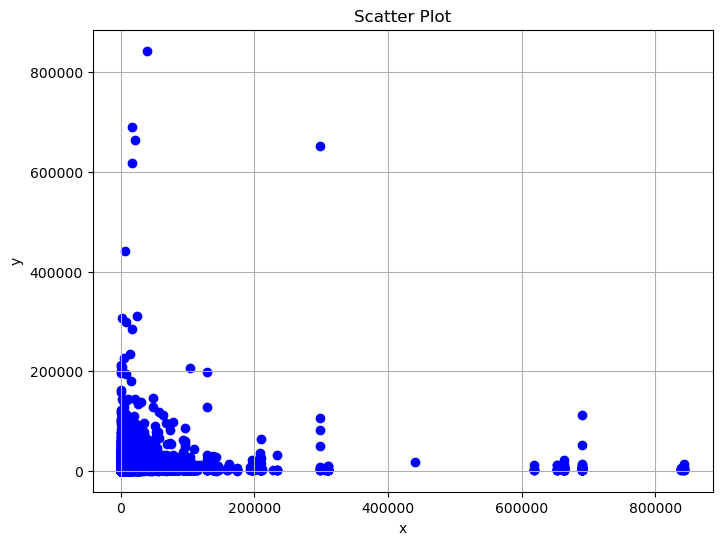

self_reference_avg_sharess


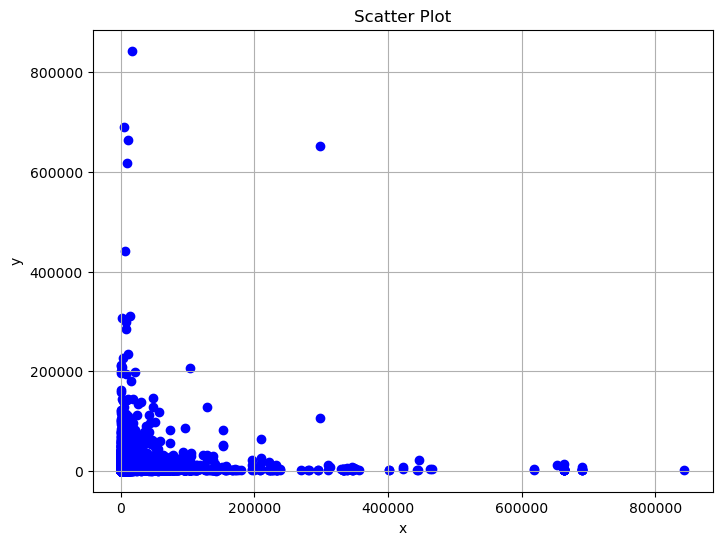

LDA_00


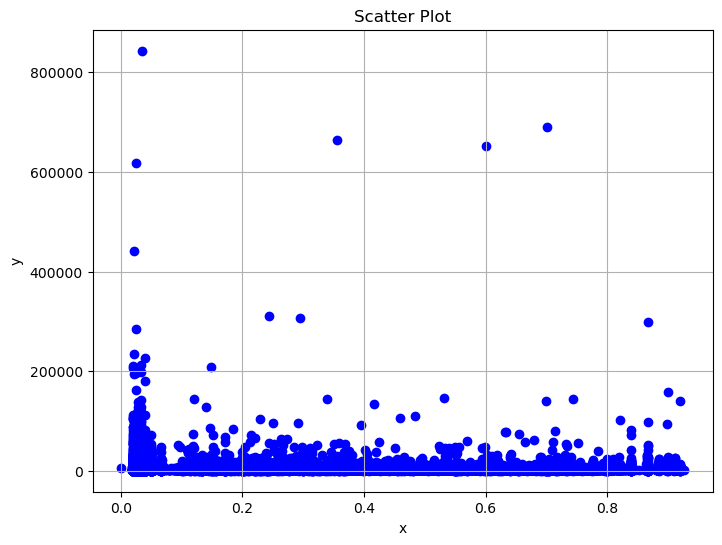

LDA_01


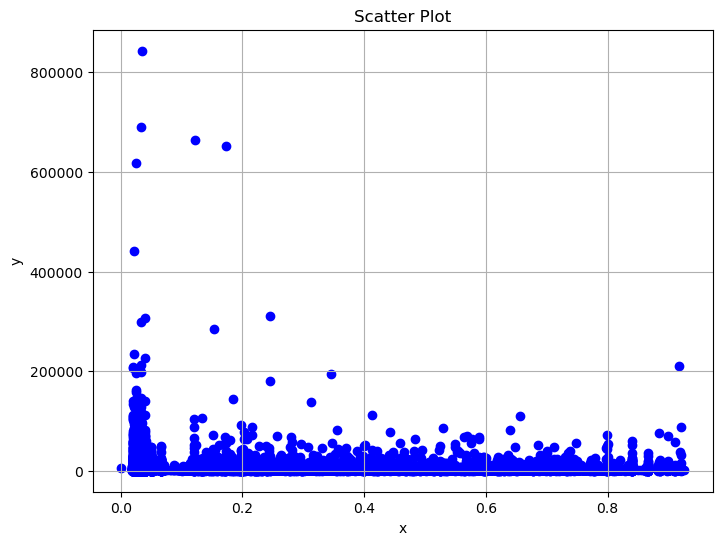

LDA_02


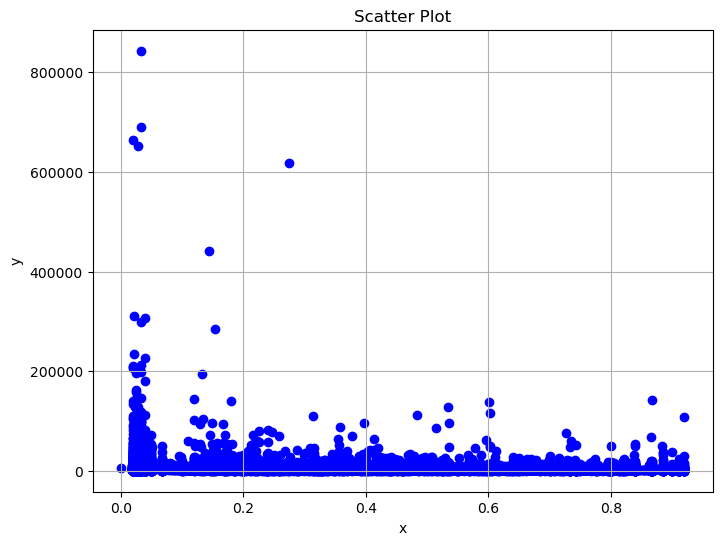

LDA_03


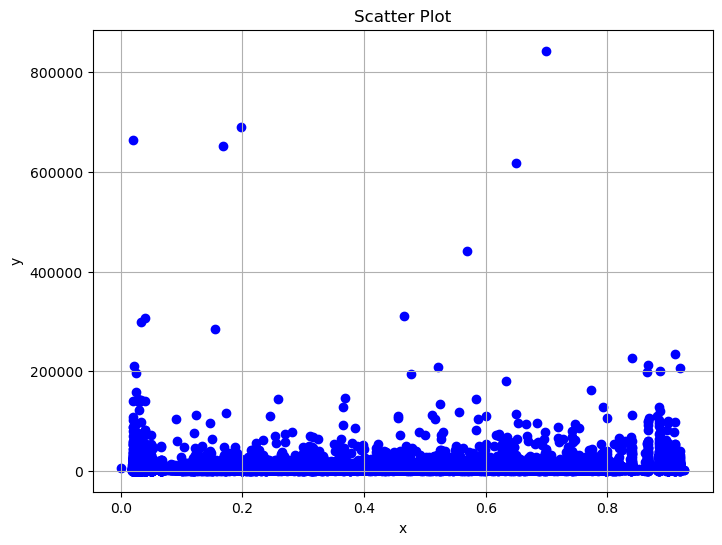

LDA_04


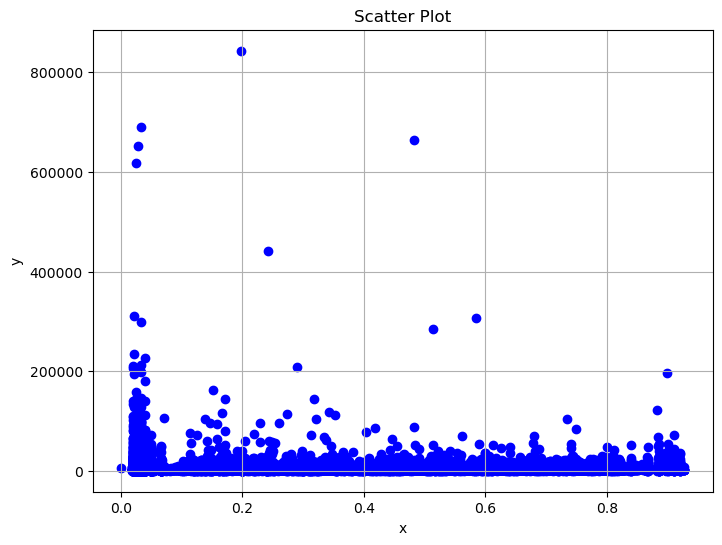

global_subjectivity


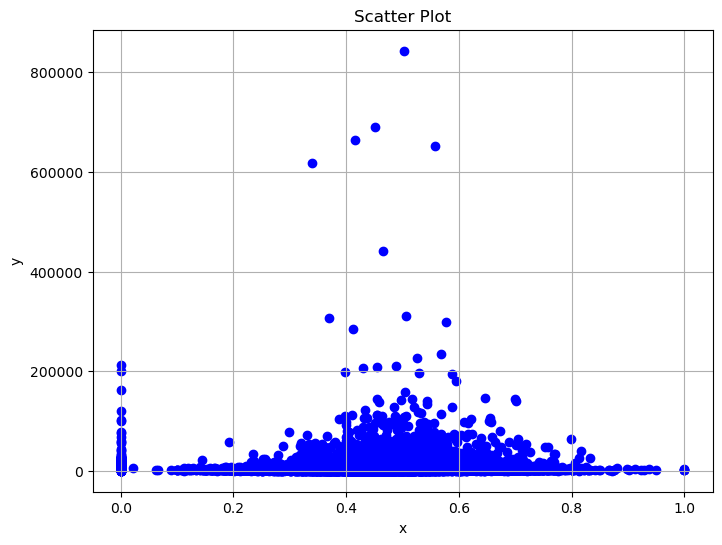

global_sentiment_polarity


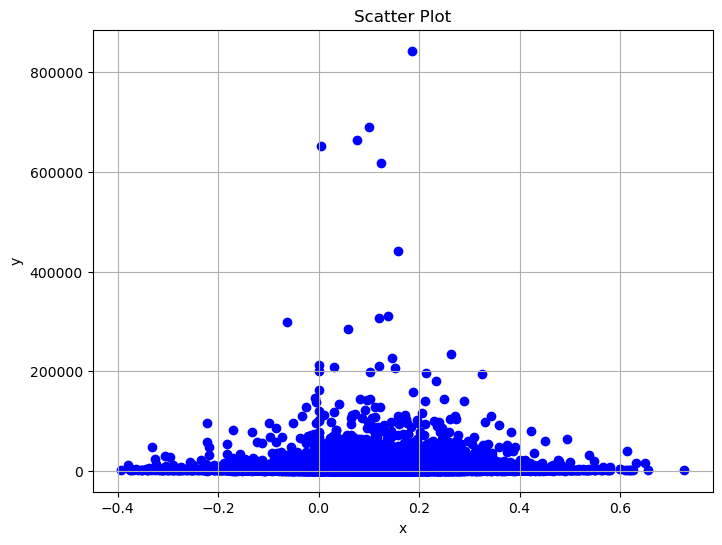

global_rate_positive_words


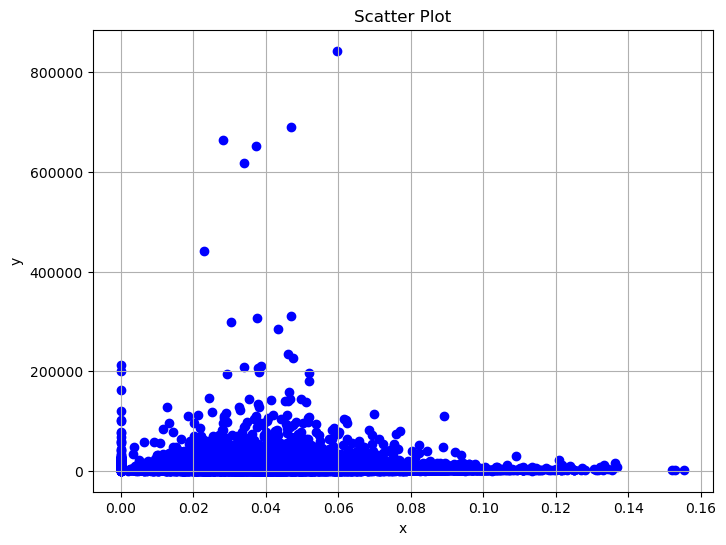

global_rate_negative_words


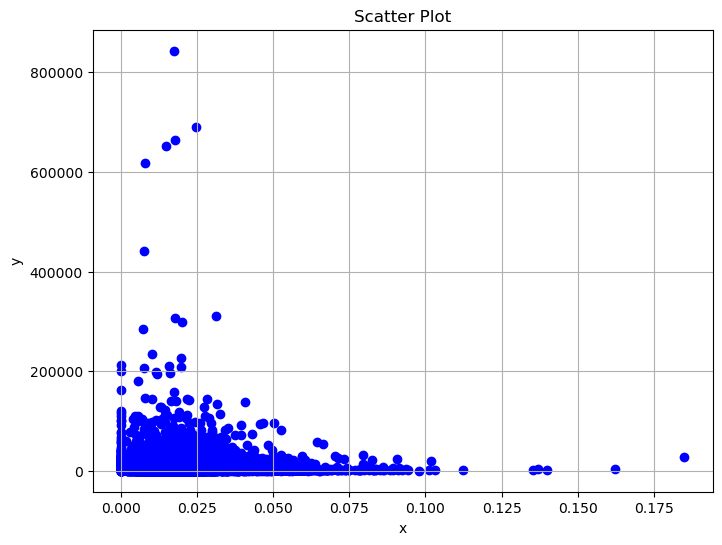

rate_positive_words


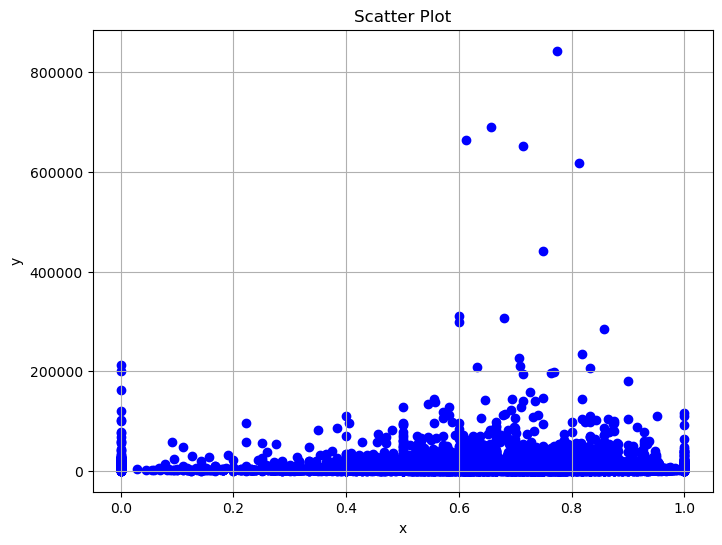

rate_negative_words


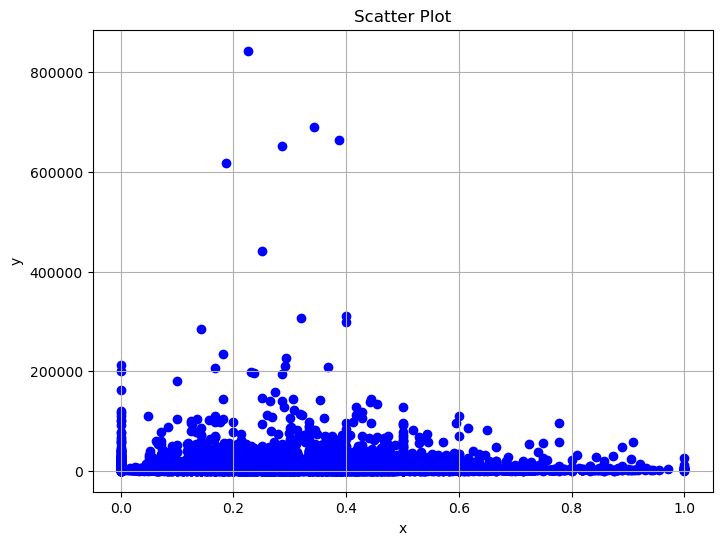

avg_positive_polarity


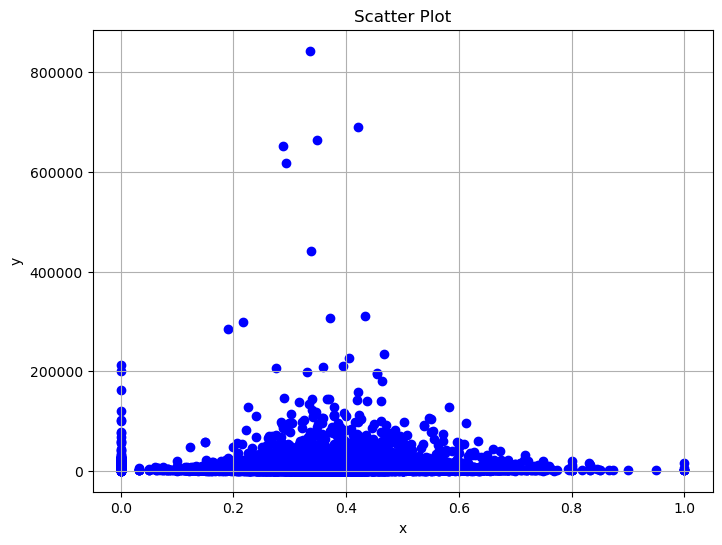

min_positive_polarity


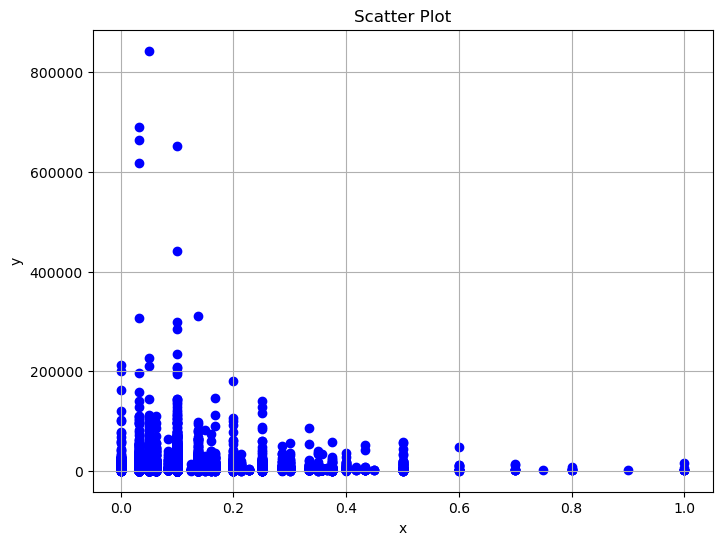

max_positive_polarity


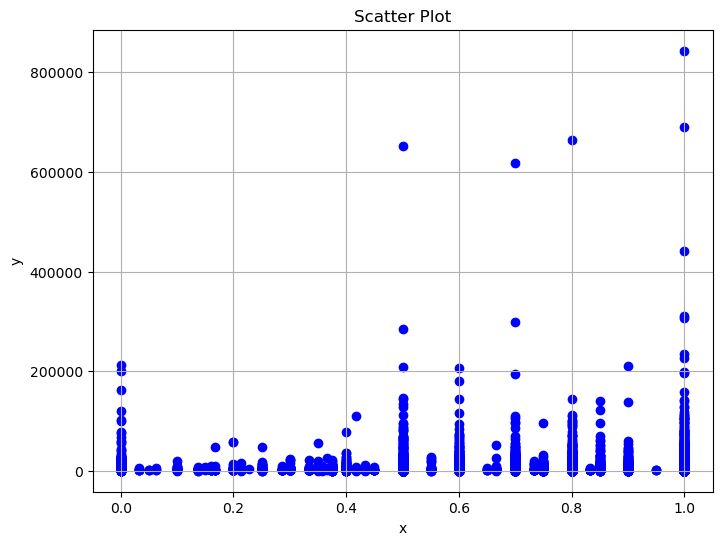

avg_negative_polarity


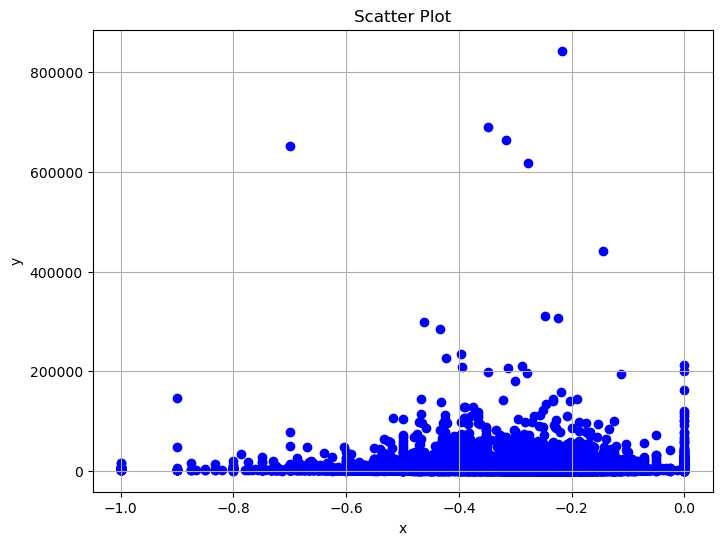

min_negative_polarity


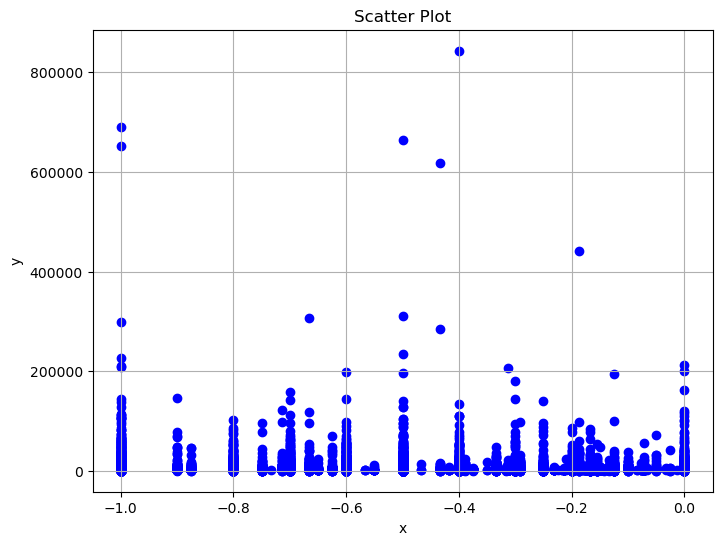

max_negative_polarity


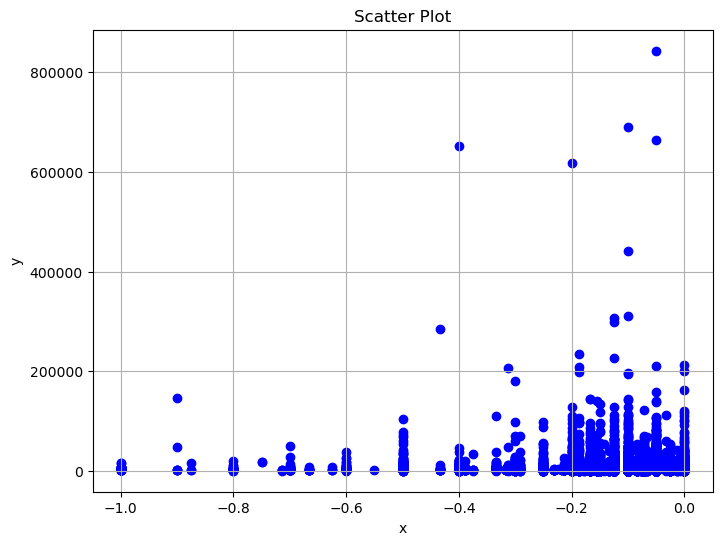

title_subjectivity


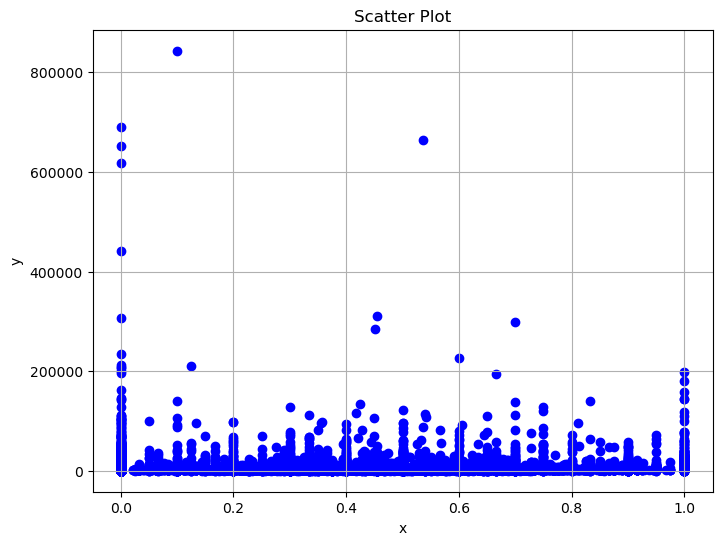

title_sentiment_polarity


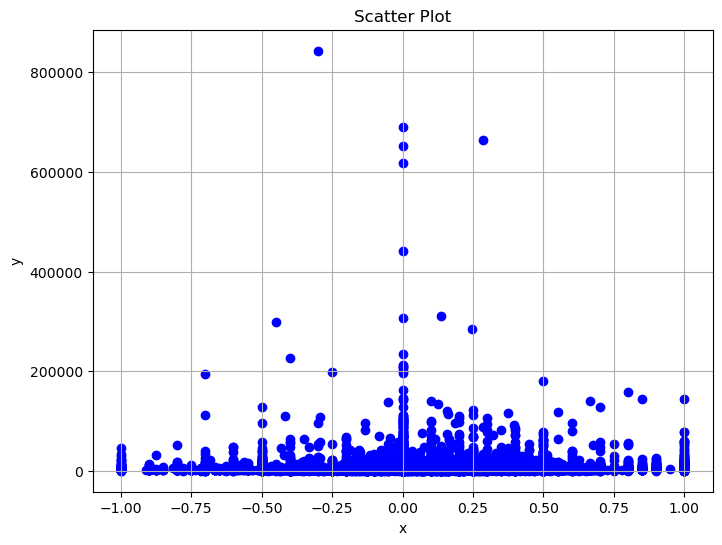

abs_title_subjectivity


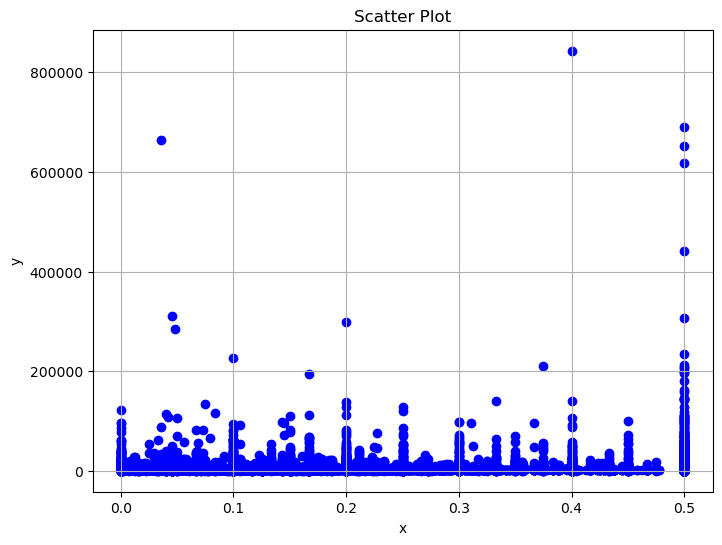

abs_title_sentiment_polarity


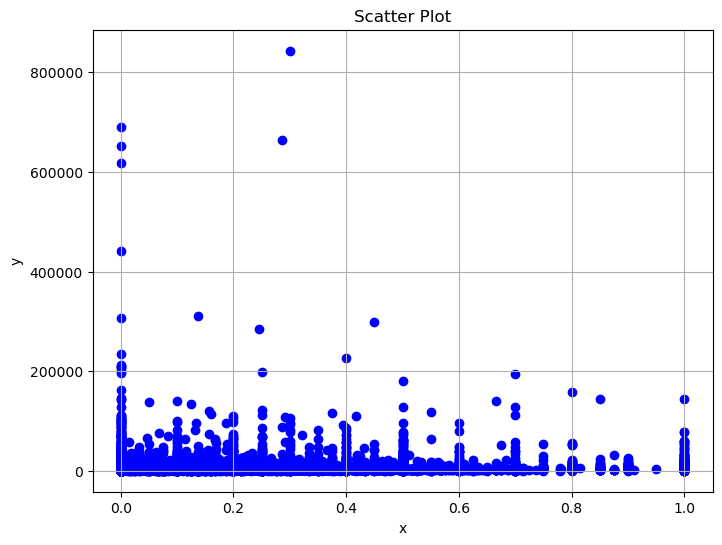

shares


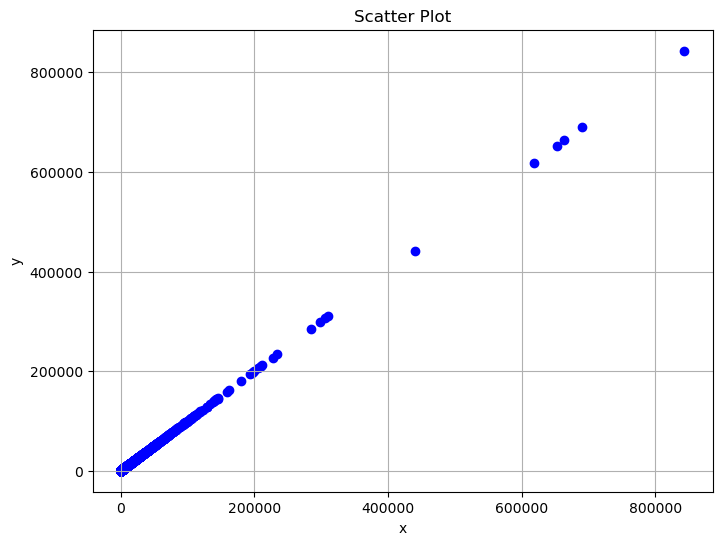

In [153]:

for col in df.columns:
    if len(df[col].unique())!=2:
        print(col)
        create_scatterplot(x = df[col], y = df['shares'])
    else:
        continue

# Handling Outliers

In [446]:

def remove_outliers(df_in):
    for col in df_in.columns :
        if len(df[col].unique()) != 2:
            Q1 = df_in[col].quantile(.25)
            Q3 = df_in[col].quantile(.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            df_filtered = df_in[~((df_in[col] < lower_bound) | (df_in[col] > upper_bound))]
        else:
            continue
    return df_filtered
    


            

In [447]:
df_filter = remove_outliers(df)

In [448]:
df_filter

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  abs_title_subjectivity  \
0             0.0              4.680365  ...                0.000000   
1             0.0              4.913725  ...                0.500000   
2             0.0              4.393365  ...                0.500000   
3             0.0              4.404896  ...                0.500000   
4             0.0              4.682836  ...                0.045455   
...           ...                   ...  ...                     ...   
39639         1.0              4.523121  ...                0.400000   
39640        48.0              4.405488  ...                0.200000   
39641         1.0              5.076923  ...                0.045455   
39642         0.0              4.975073  ...                0.500000   
39643         2.0              4.471338  ...                0.166667   

       abs_title_sentiment_polarity  shares  sum_weekday_is_monday  \
0                          0.187500     593                  593.0   
1                          0.000000     711                  711.0   
2                          0.000000    1500                 1500.0   
3                          0.000000    1200                 1200.0   
4                          0.136364     505                  505.0   
...                             ...     ...                    ...   
39639                      0.000000    1800                    0.0   
39640                      1.000000    1900                    0.0   
39641                      0.136364    1900                    0.0   
39642                      0.000000    1100                    0.0   
39643                      0.250000    1300                    0.0   

       sum_weekday_is_tuesday  sum_weekday_is_wednesday  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
39639                     0.0                    1800.0   
39640                     0

n_tokens_title


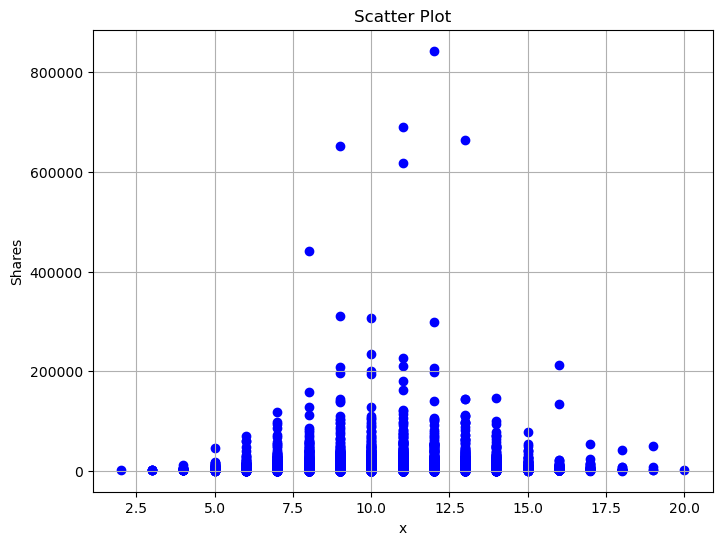

n_tokens_content


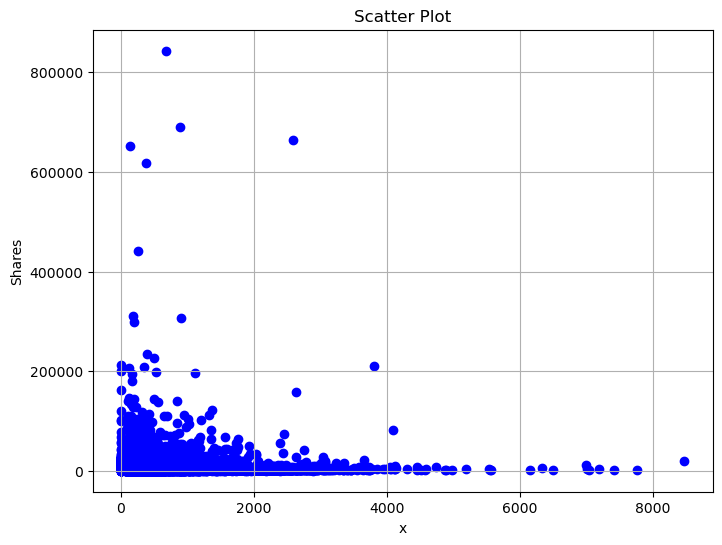

n_unique_tokens


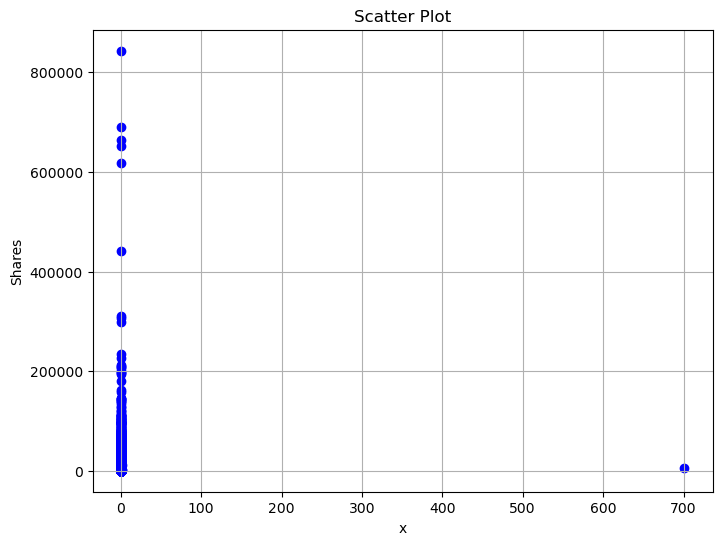

n_non_stop_words


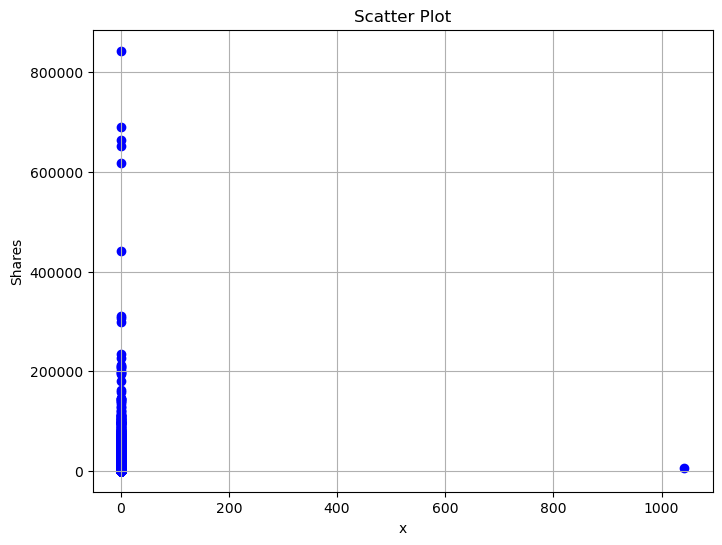

n_non_stop_unique_tokens


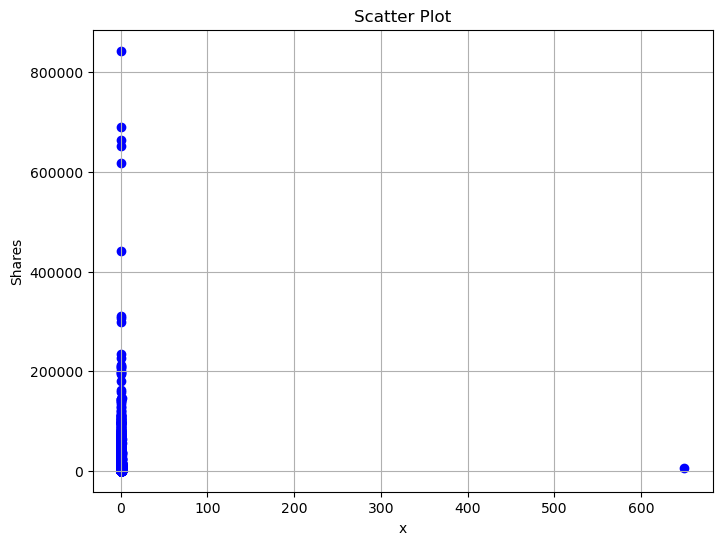

num_hrefs


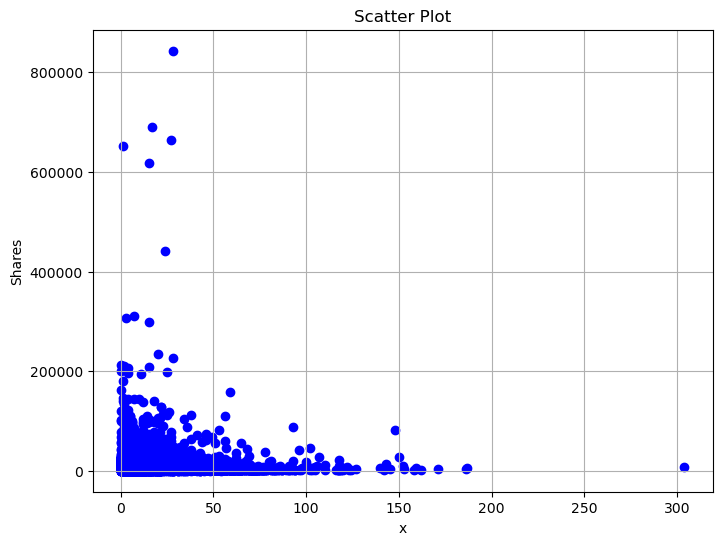

num_self_hrefs


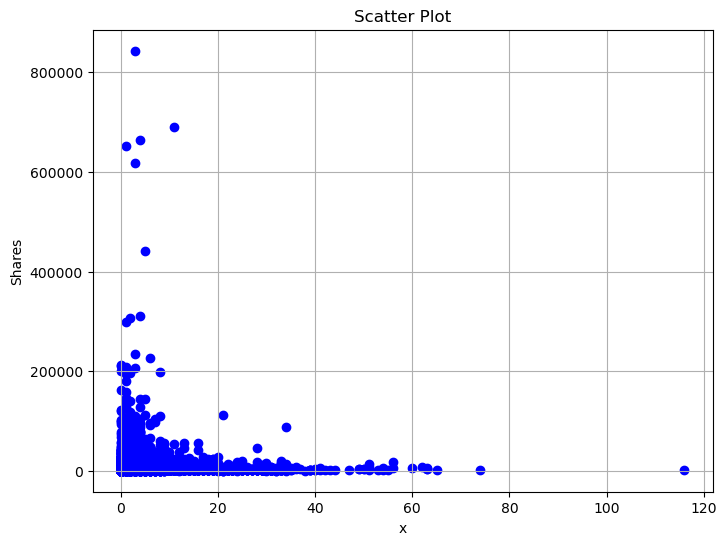

num_imgs


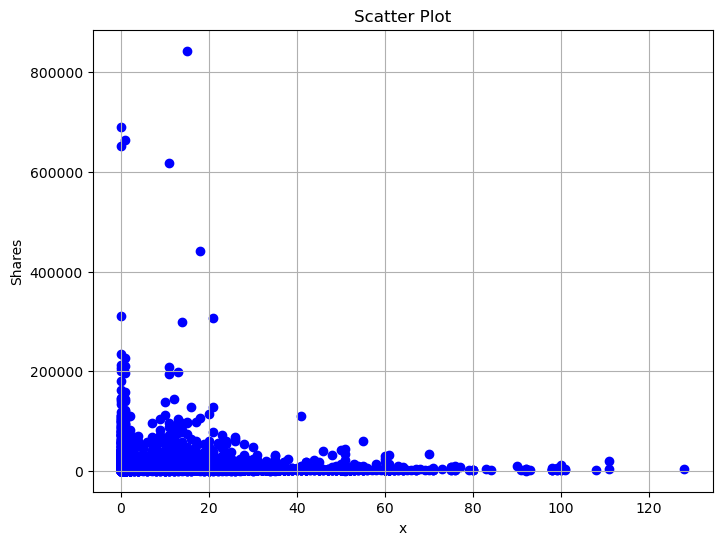

num_videos


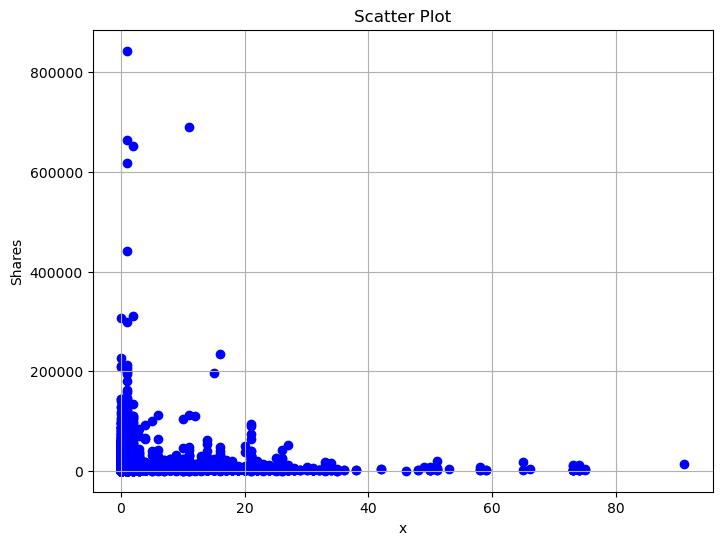

average_token_length


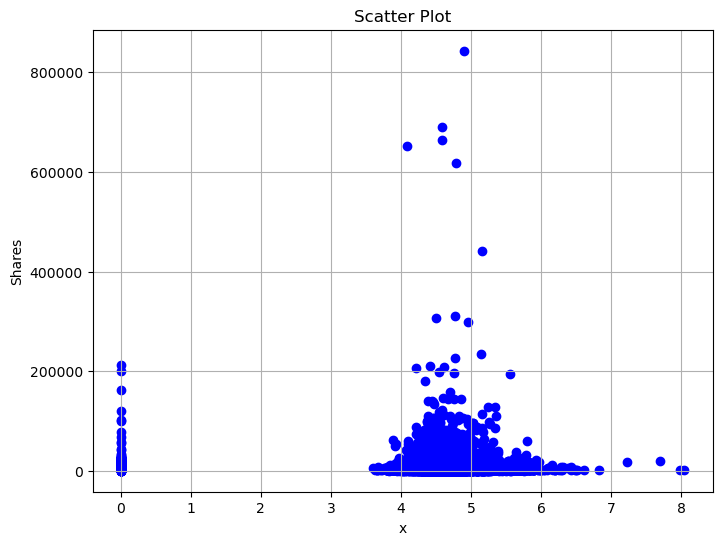

num_keywords


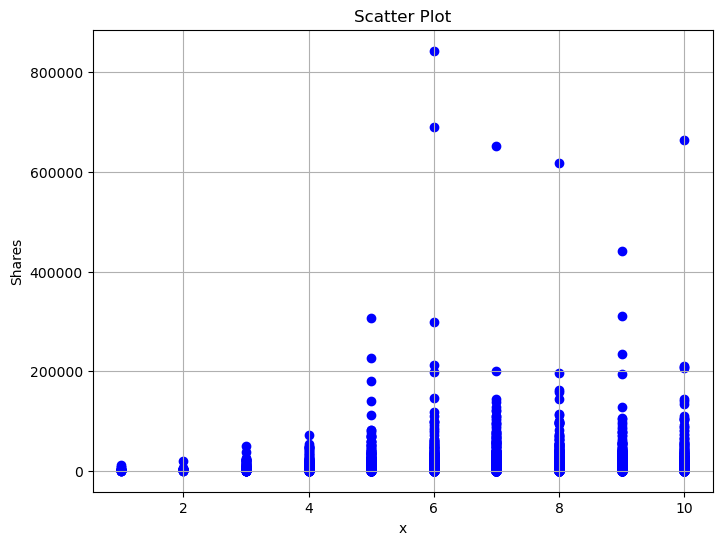

data_channel_is_world


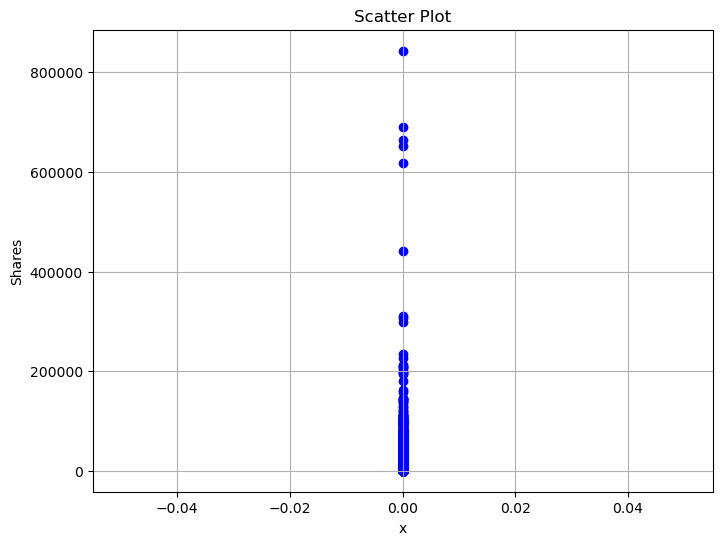

kw_min_min


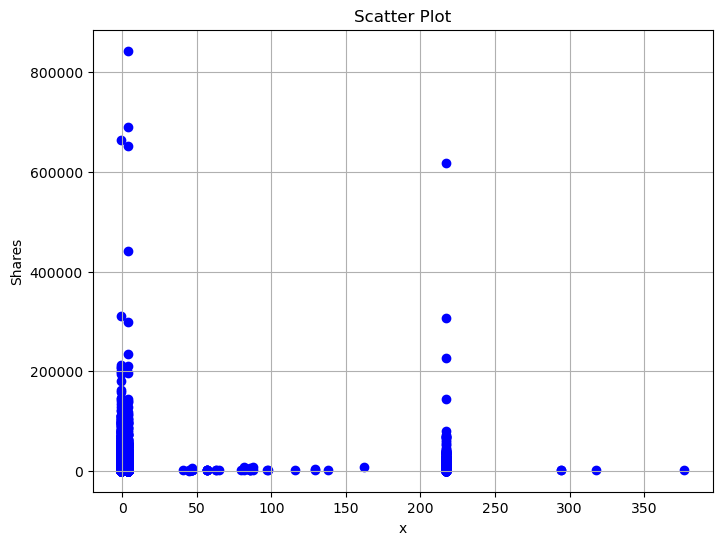

kw_max_min


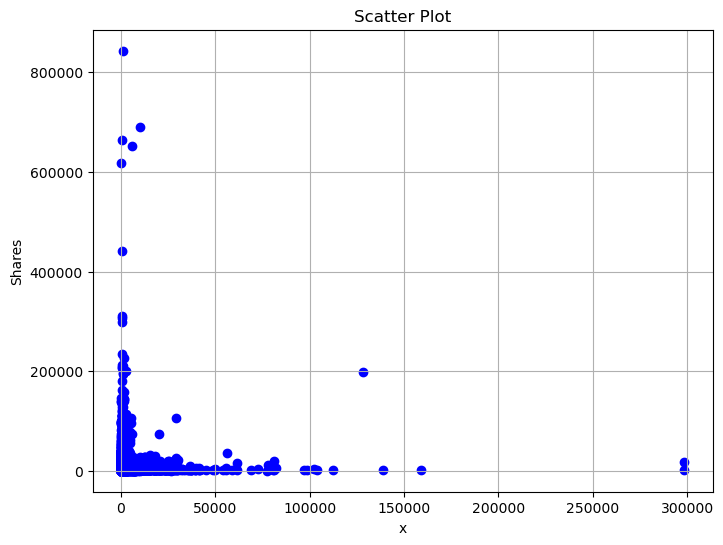

kw_avg_min


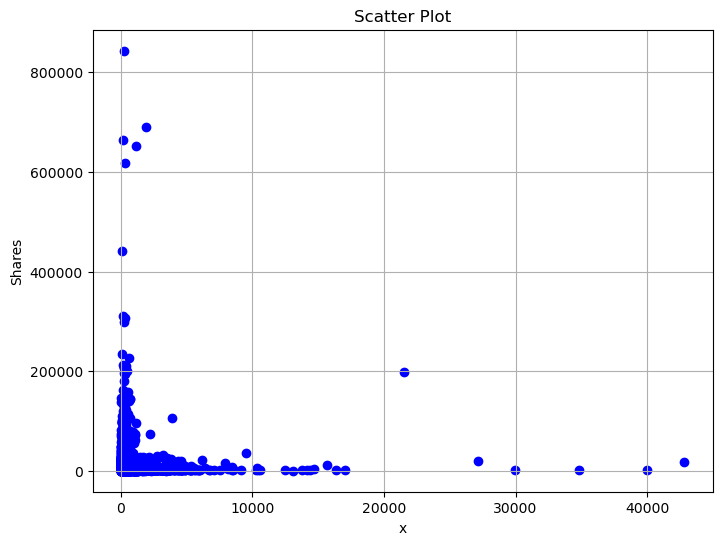

kw_min_max


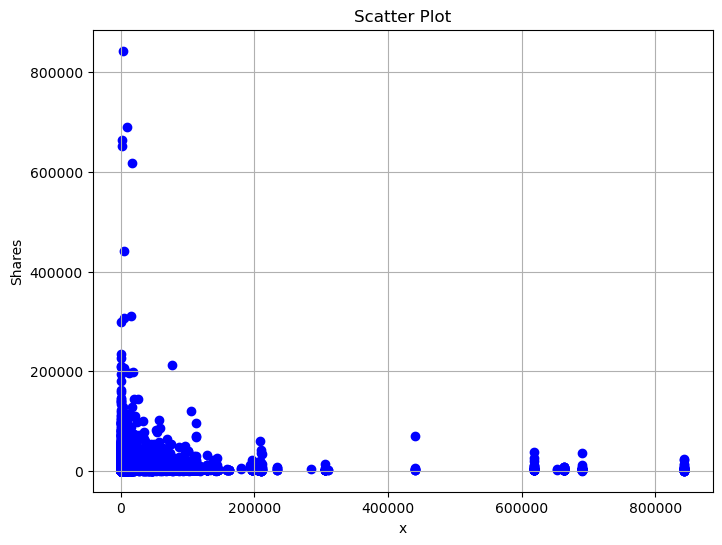

kw_max_max


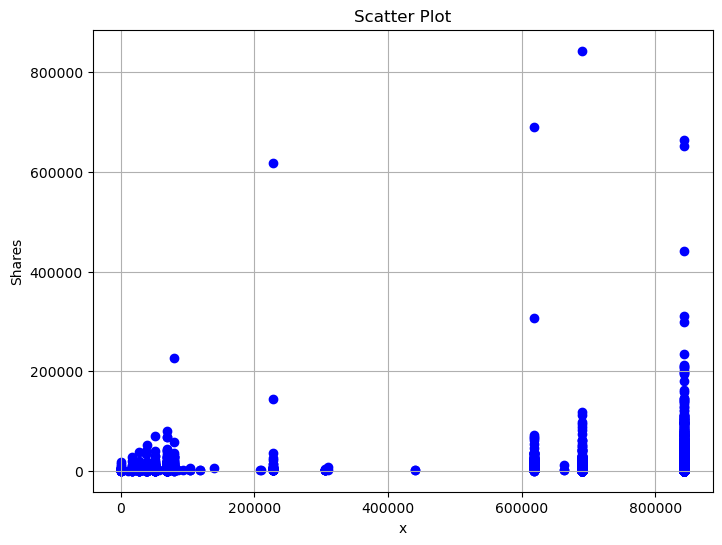

kw_avg_max


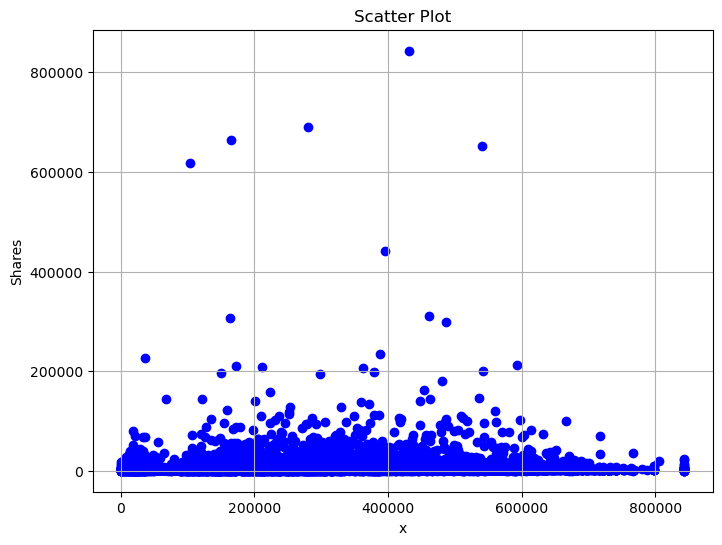

kw_min_avg


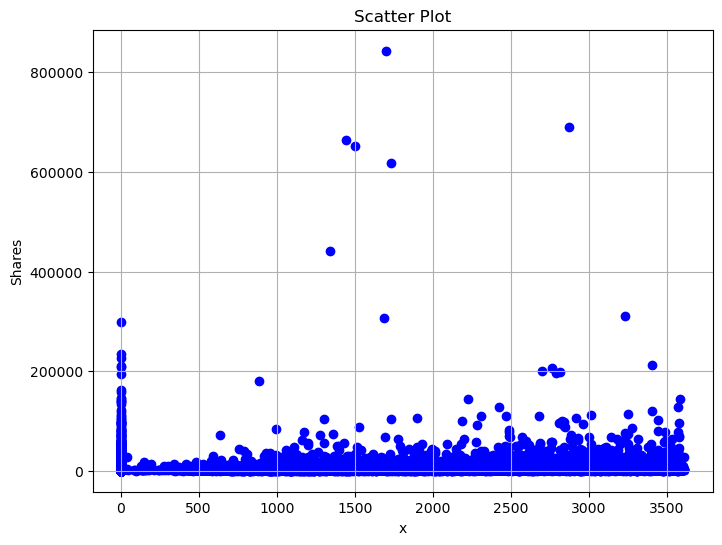

kw_max_avg


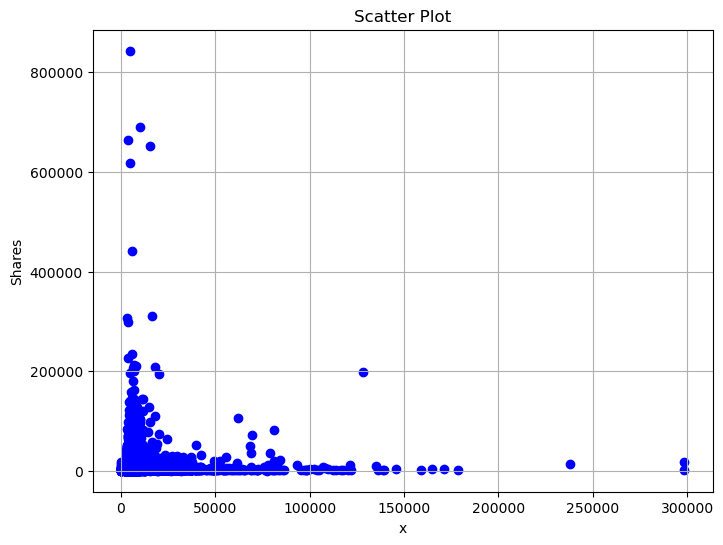

kw_avg_avg


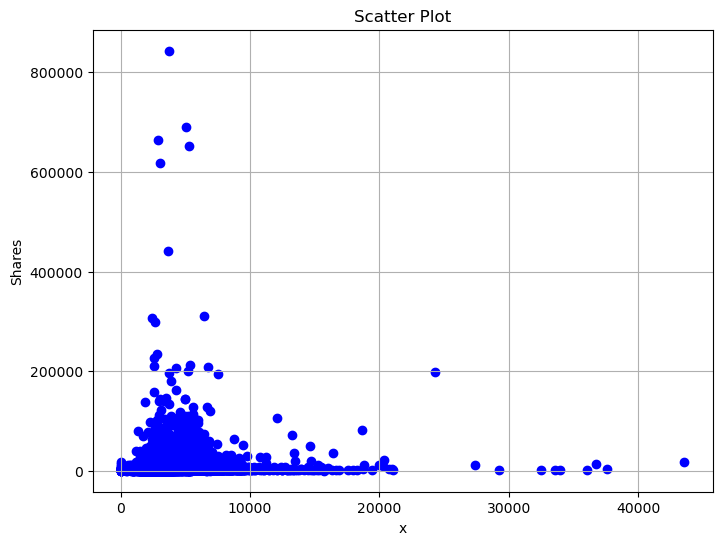

self_reference_min_shares


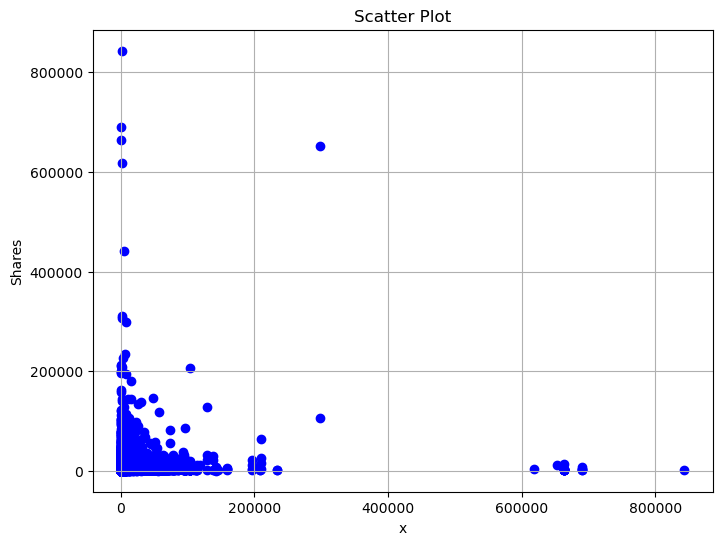

self_reference_max_shares


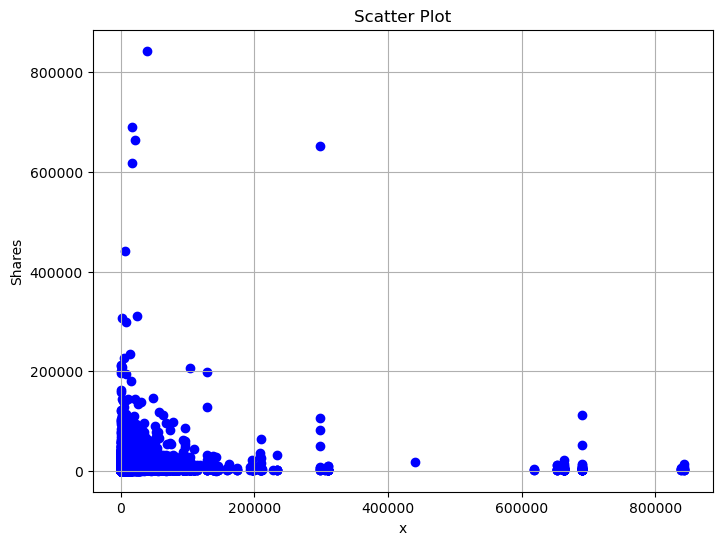

self_reference_avg_sharess


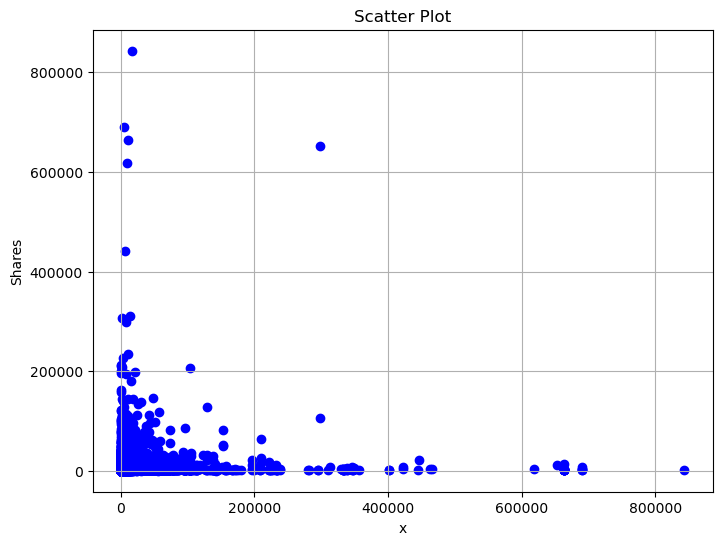

LDA_00


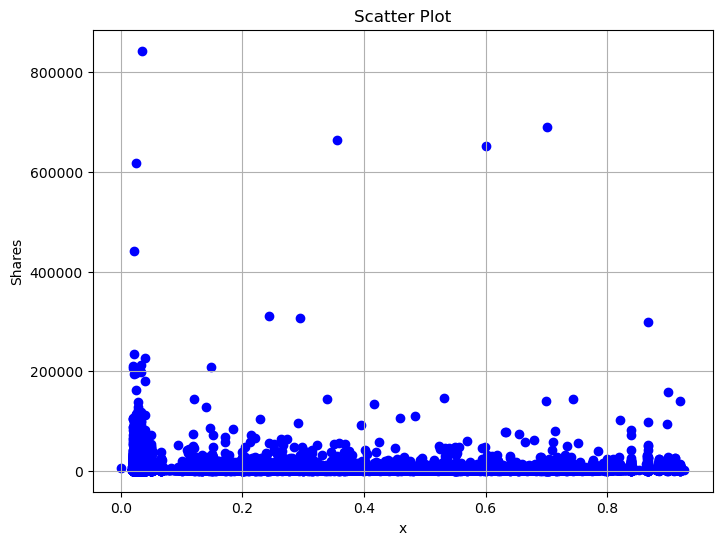

LDA_01


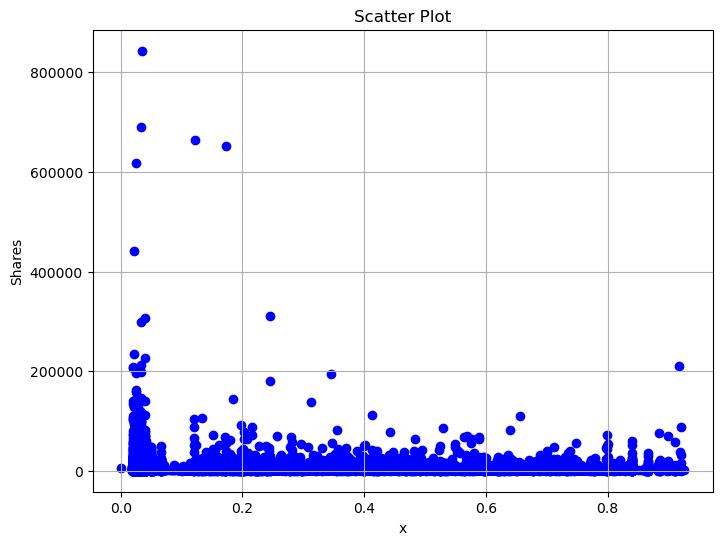

LDA_02


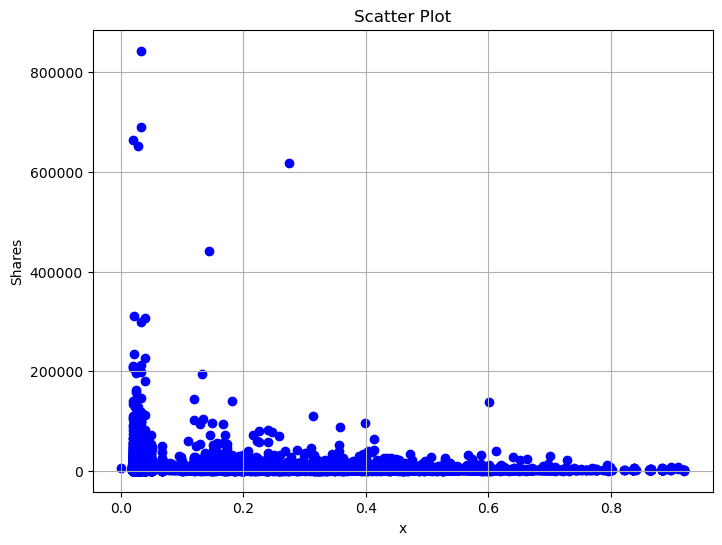

LDA_03


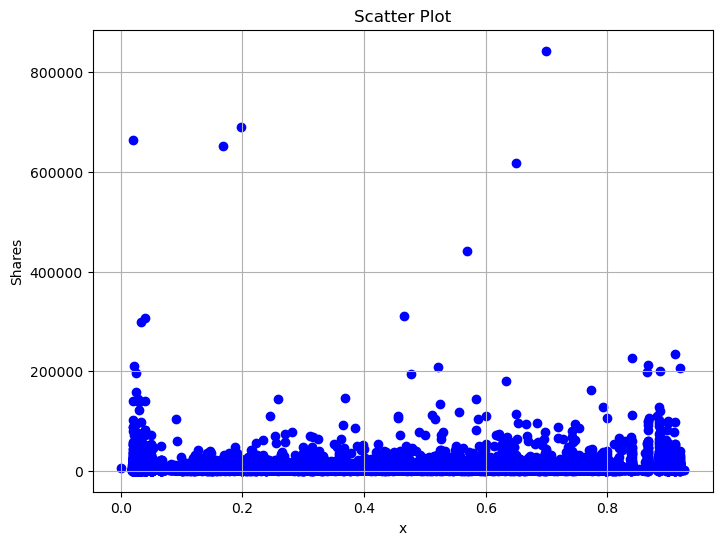

LDA_04


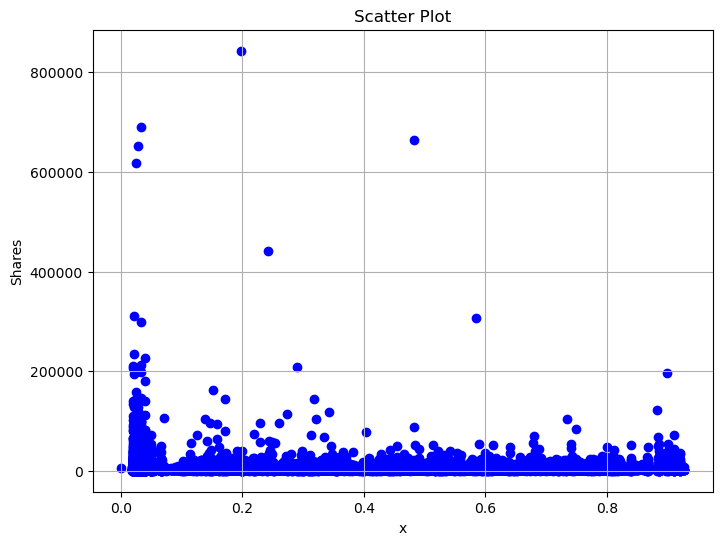

global_subjectivity


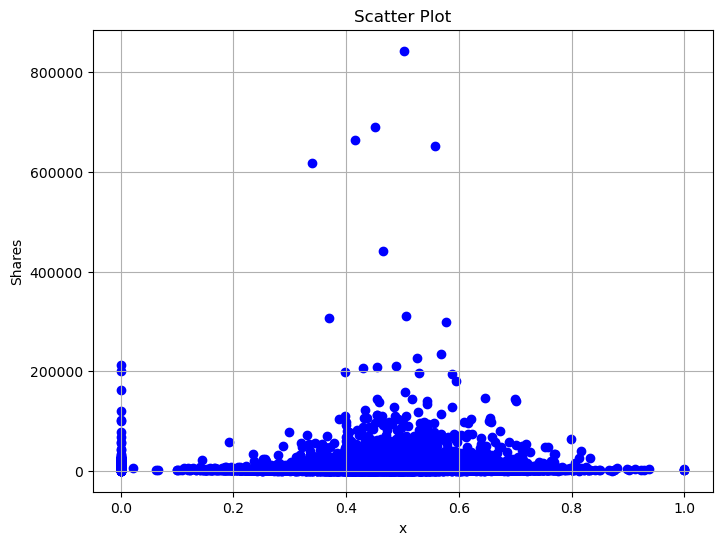

global_sentiment_polarity


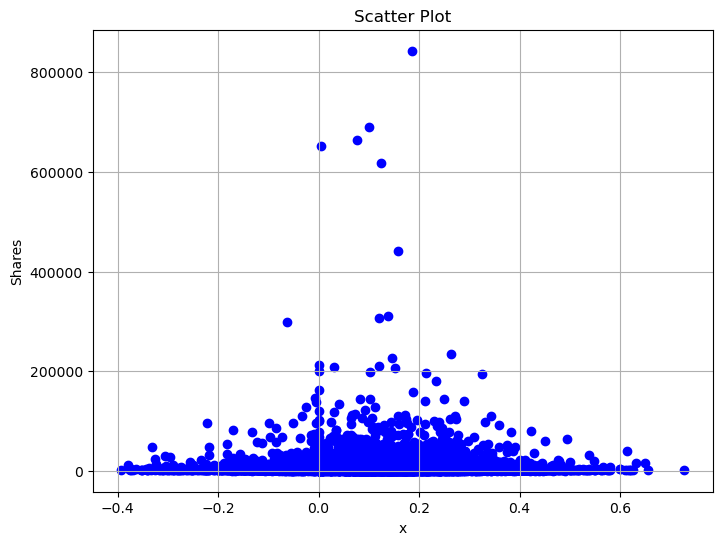

global_rate_positive_words


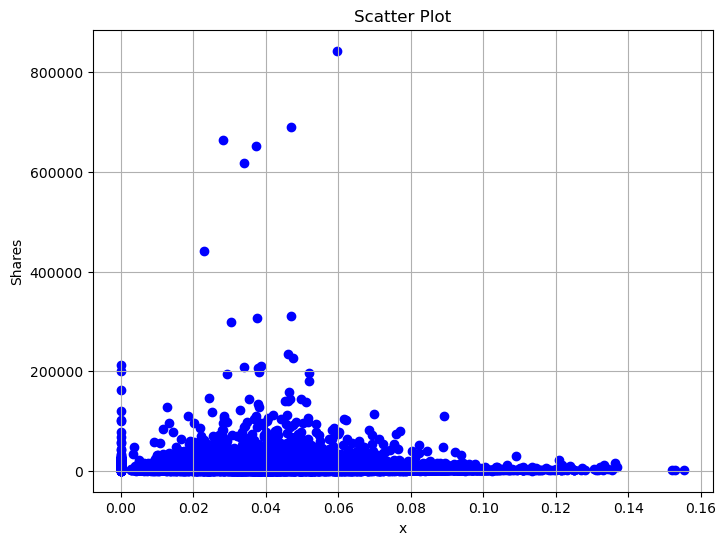

global_rate_negative_words


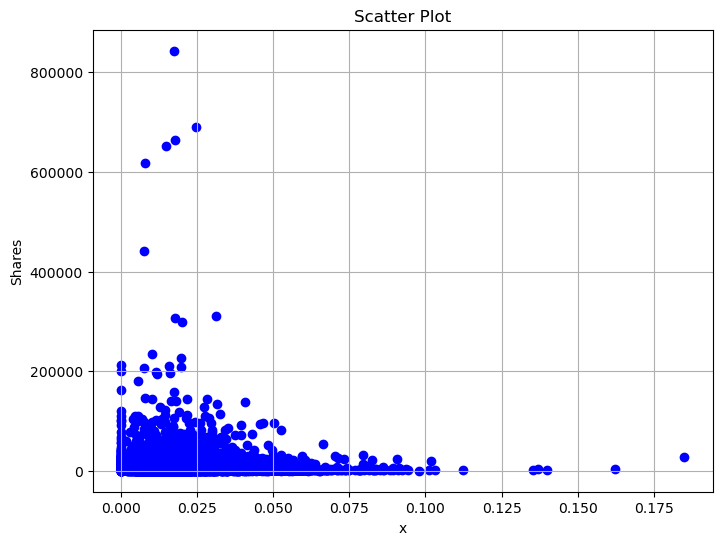

rate_positive_words


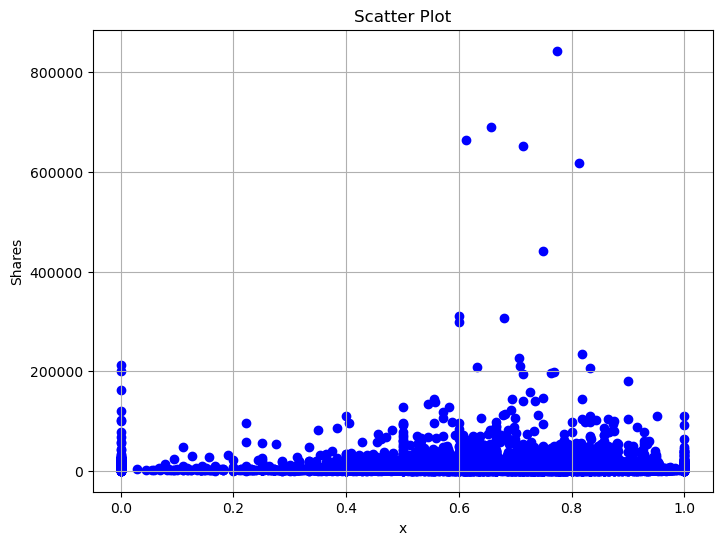

rate_negative_words


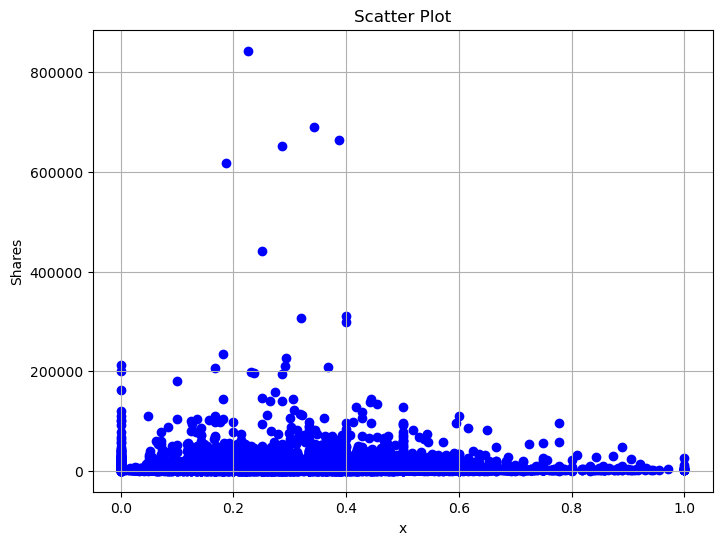

avg_positive_polarity


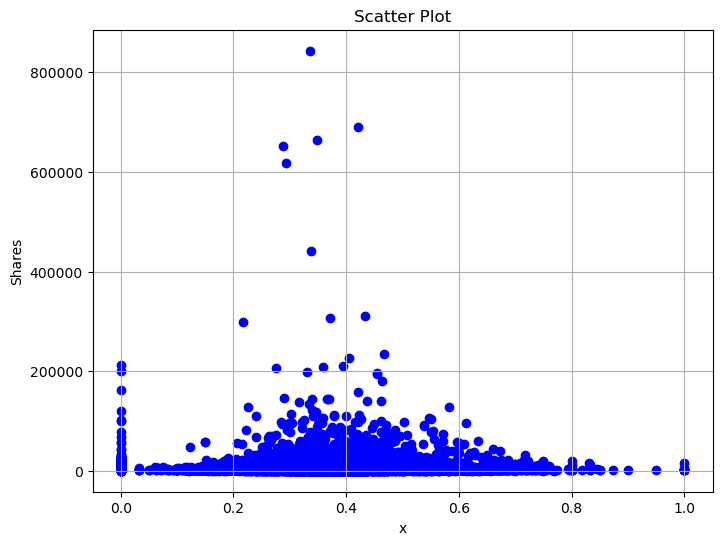

min_positive_polarity


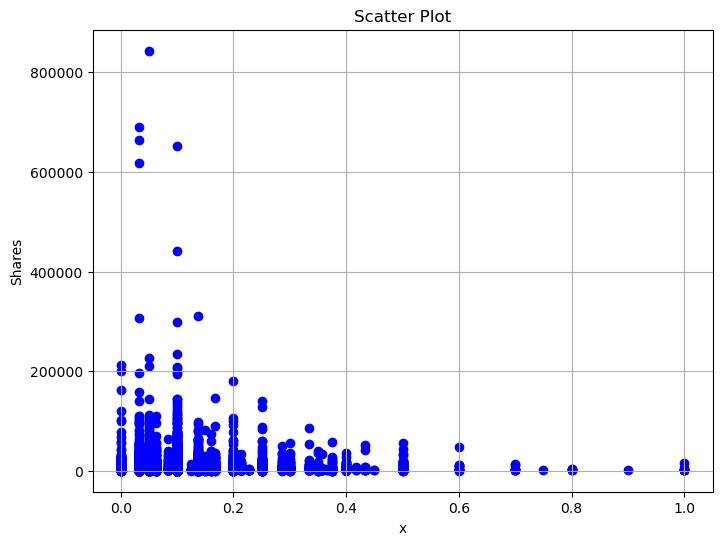

max_positive_polarity


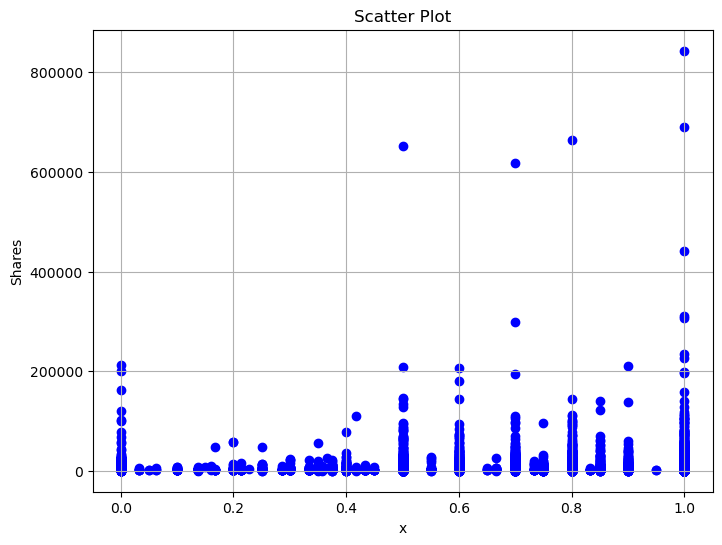

avg_negative_polarity


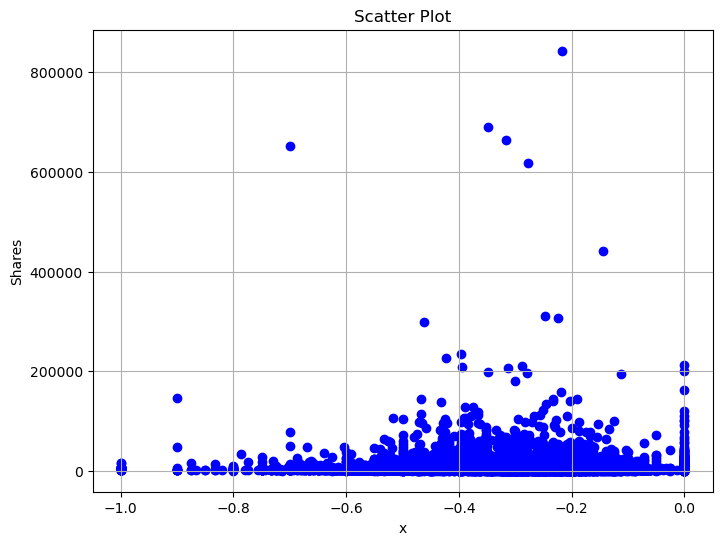

min_negative_polarity


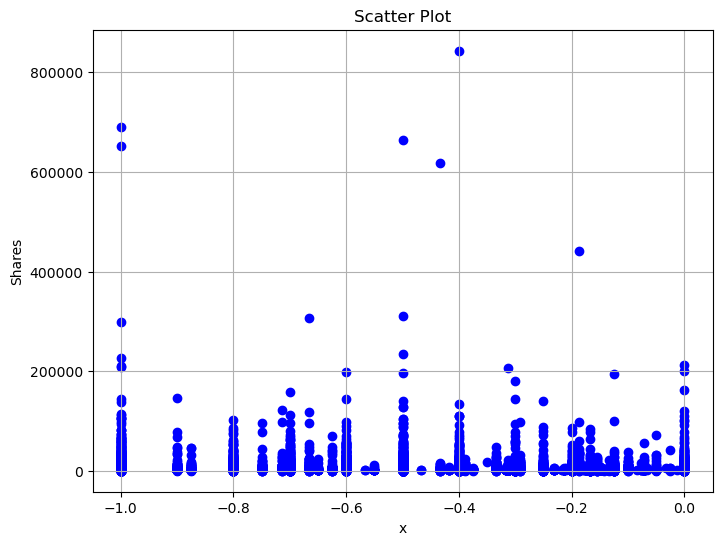

max_negative_polarity


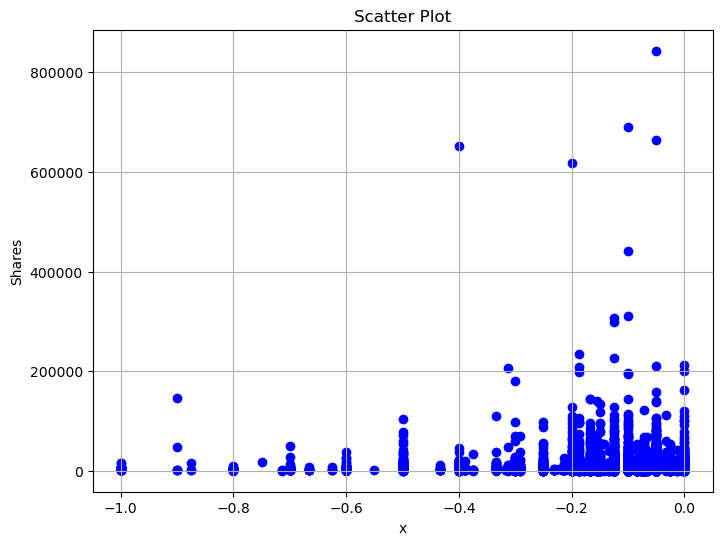

title_subjectivity


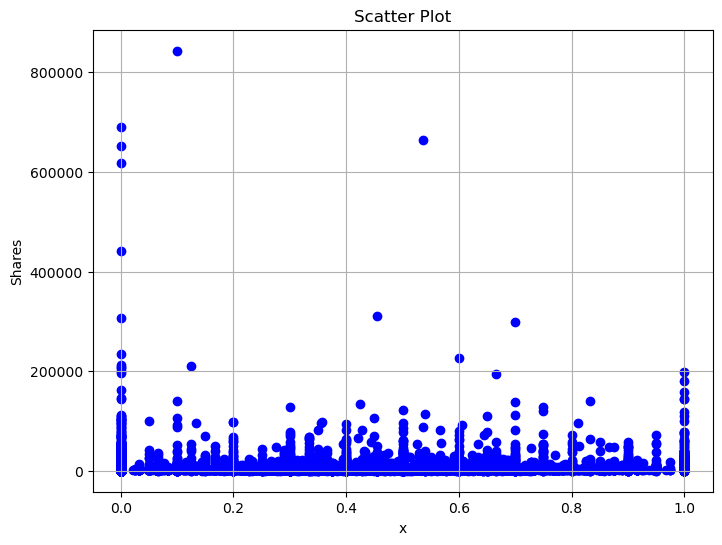

title_sentiment_polarity


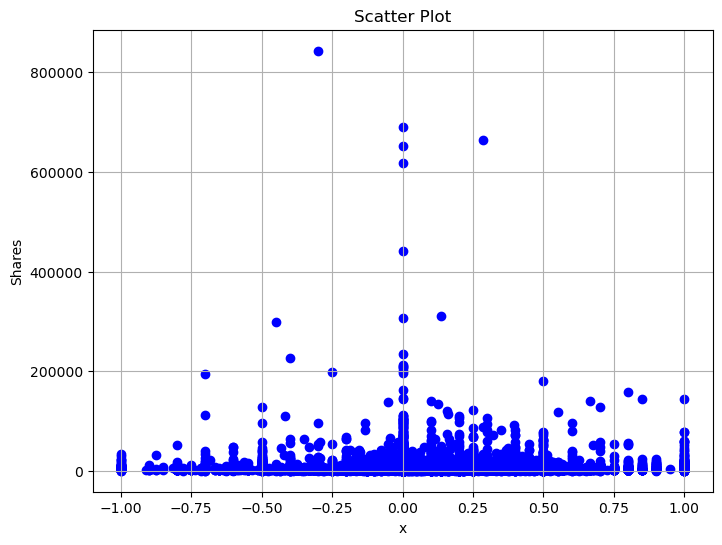

abs_title_subjectivity


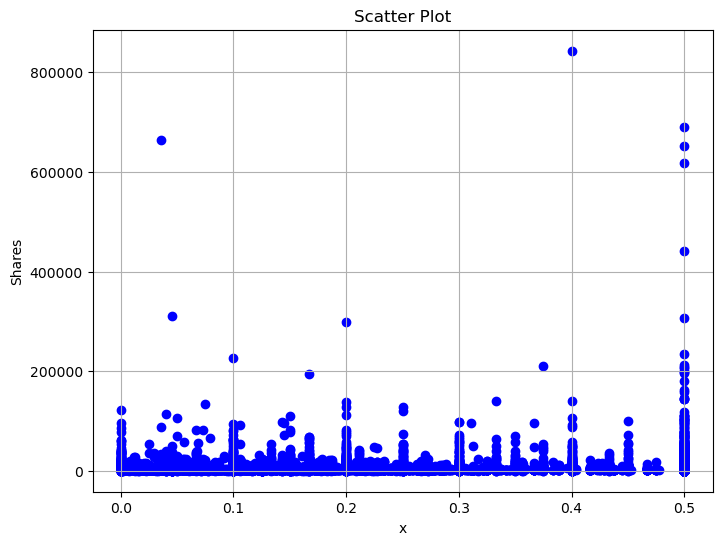

abs_title_sentiment_polarity


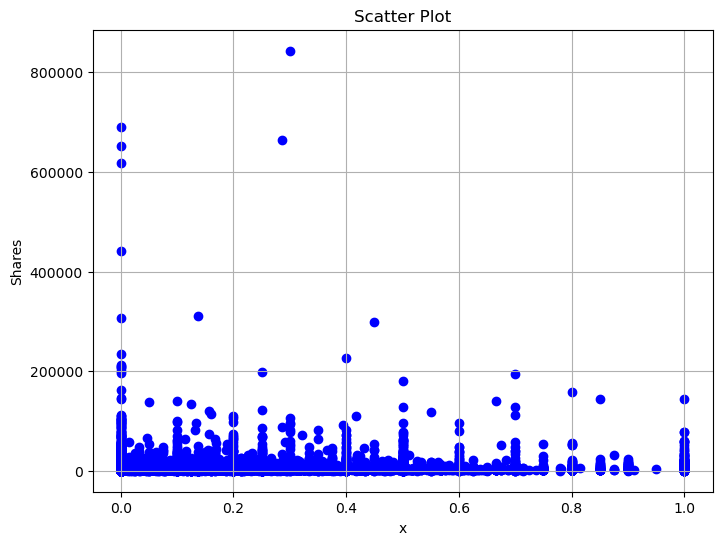

shares


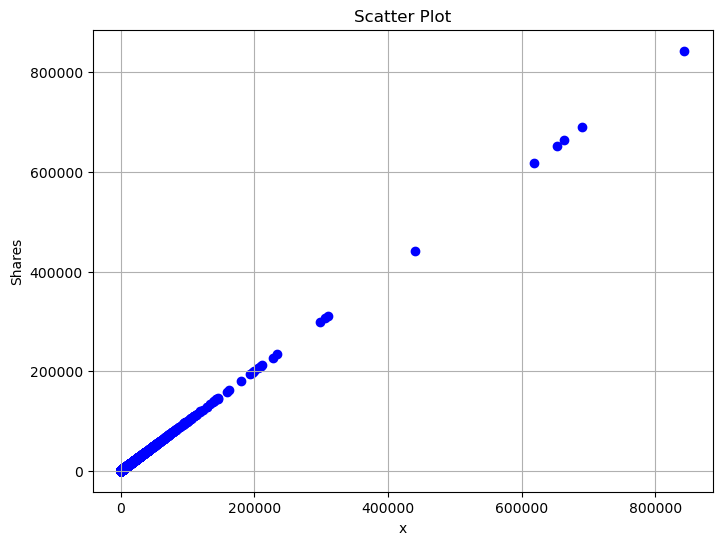

sum_weekday_is_monday


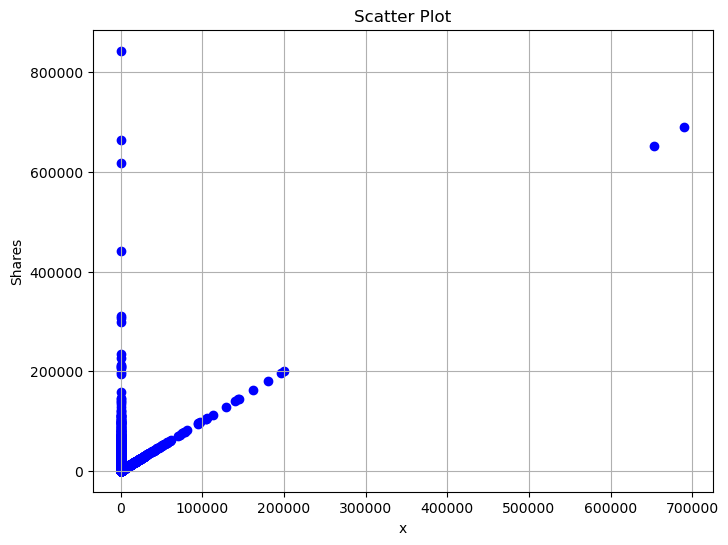

sum_weekday_is_tuesday


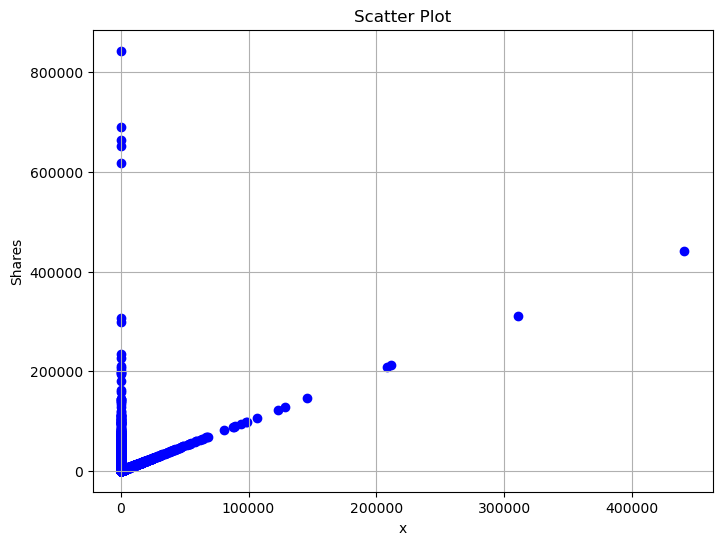

sum_weekday_is_wednesday


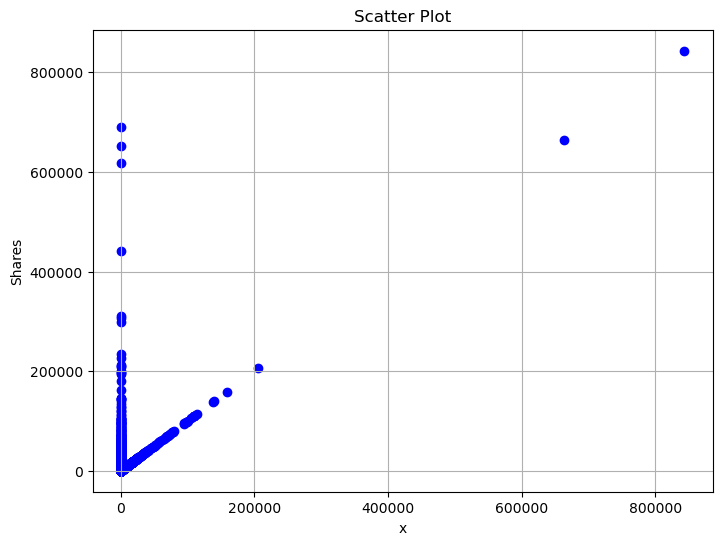

sum_weekday_is_thursday


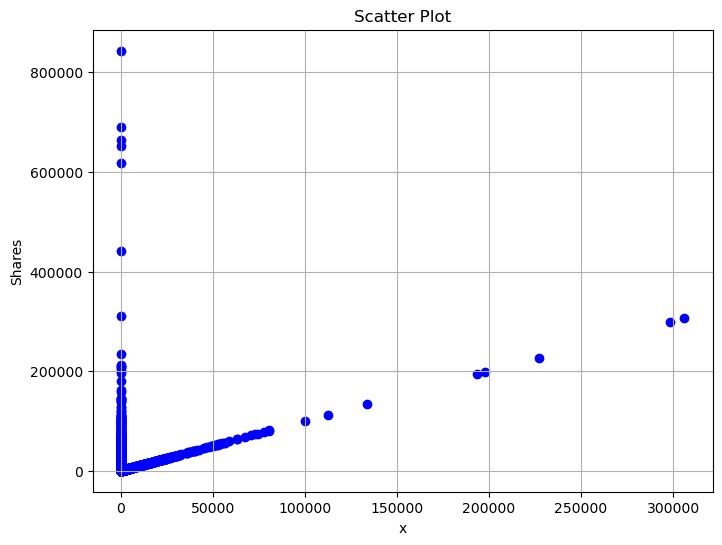

sum_weekday_is_friday


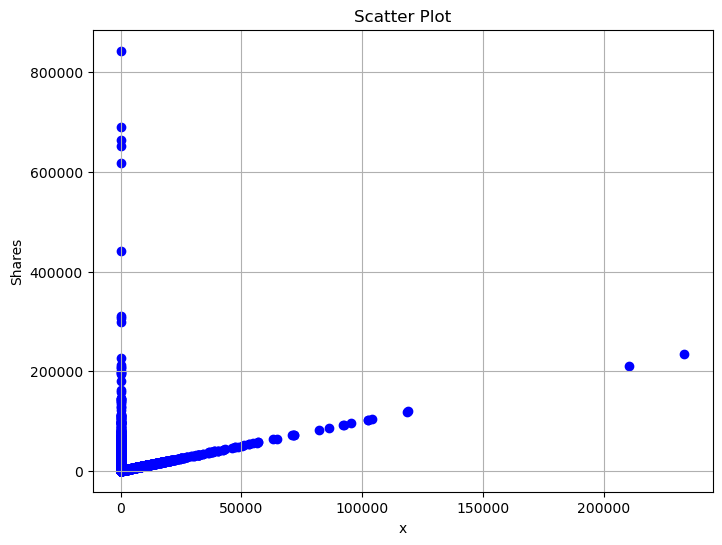

sum_weekday_is_saturday


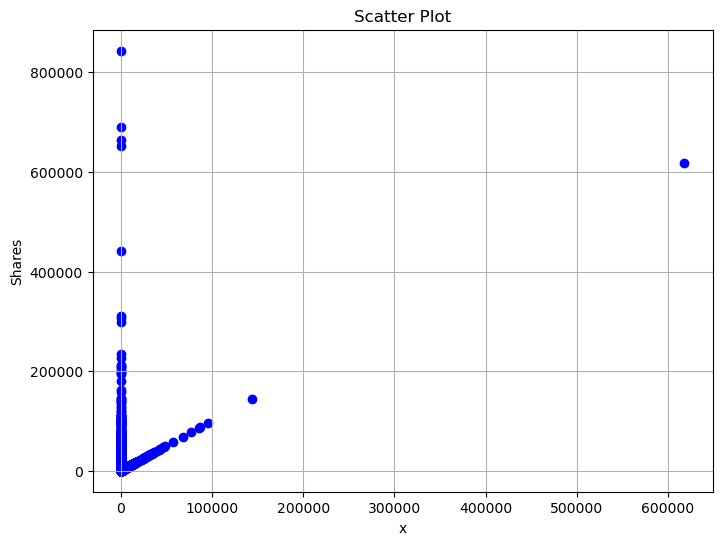

sum_weekday_is_sunday


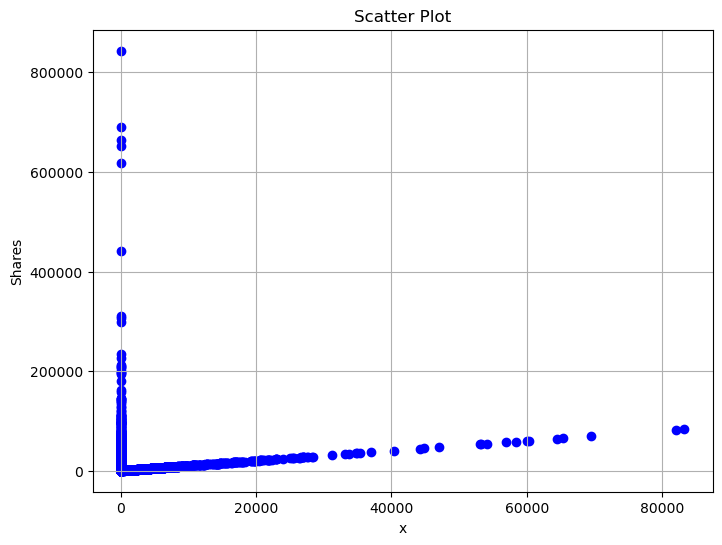

sum_data_channel_is_lifestyle


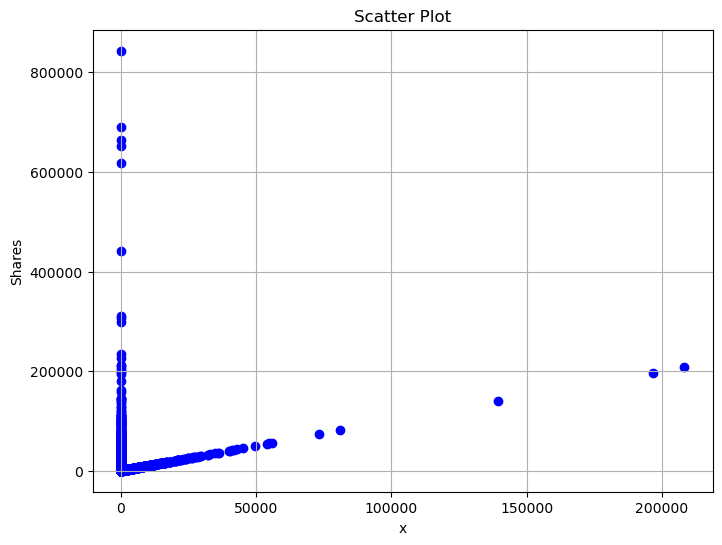

sum_data_channel_is_bus


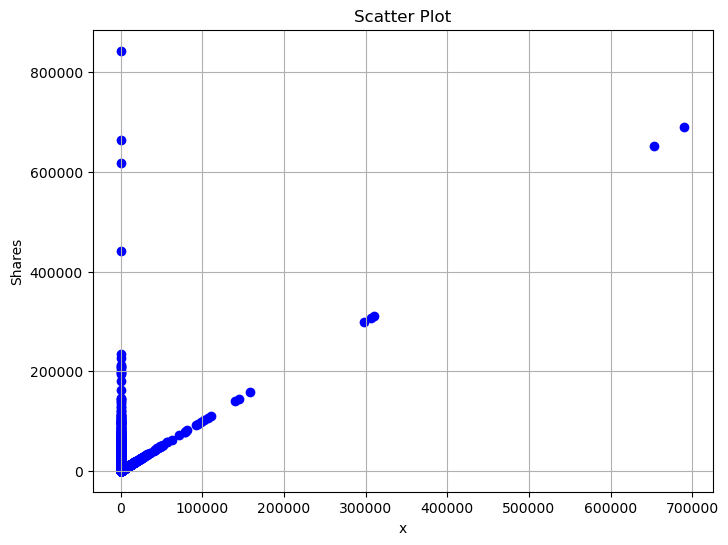

sum_data_channel_is_socmed


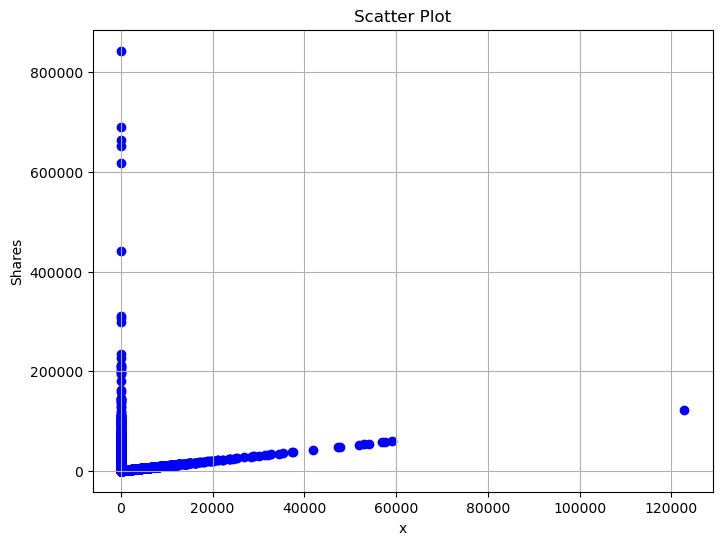

sum_data_channel_is_tech


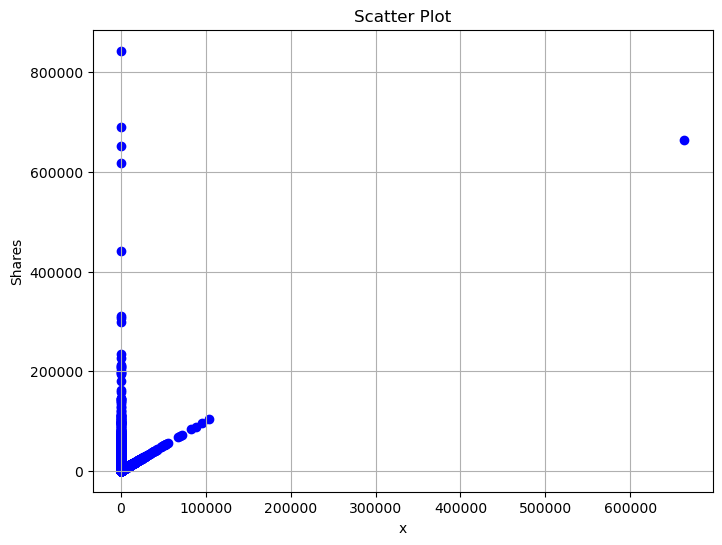

sum_data_channel_is_world


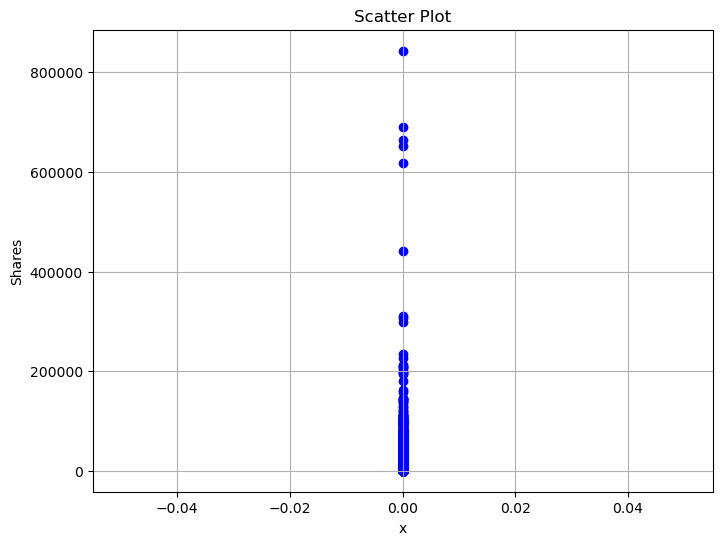

In [223]:

for col in df_filter.columns:
    if len(df_filter[col].unique())!=2:
        print(col)
        create_scatterplot(x = df_filter[col], y = df_filter['shares'])
    else:
        continue

In [124]:
df[df['data_channel_is_lifestyle'] == 1]

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
6                 8.0             960.0         0.418163               1.0   
11               10.0             187.0         0.666667               1.0   
18               11.0             103.0         0.689320               1.0   
28               10.0             243.0         0.619247               1.0   
34                8.0             204.0         0.586207               1.0   
...               ...               ...              ...               ...   
39557            12.0             908.0         0.455556               1.0   
39596            12.0             270.0         0.594378               1.0   
39599            11.0             610.0         0.510888               1.0   
39608            11.0             575.0         0.530466               1.0   
39636             8.0            2509.0         0.348878               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
6                      0.549834       21.0            20.0      20.0   
11                     0.800000        7.0             0.0       1.0   
18                     0.806452        3.0             1.0       1.0   
28                     0.824427        1.0             1.0       0.0   
34                     0.698413        7.0             2.0       1.0   
...                         ...        ...             ...       ...   
39557                  0.616236        7.0             1.0       2.0   
39596                  0.644068       32.0             4.0      14.0   
39599                  0.686441       11.0             0.0       1.0   
39608                  0.681440        8.0             5.0       1.0   
39636                  0.464923       23.0             1.0      10.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
6             0.0              4.654167  ...               0.100000   
11            0.0              4.657754  ...               0.200000   
18            0.0              4.844660  ...               0.033333   
28            0.0              4.382716  ...               0.136364   
34            0.0              4.671569  ...               0.100000   
...           ...                   ...  ...                    ...   
39557         0.0              4.524229  ...               0.050000   
39596         1.0              4.385185  ...               0.136364   
39599         0.0              4.529508  ...               0.100000   
39608         0.0              4.582609  ...               0.033333   
39636         0.0              4.569550  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
6                       1.00              -0.224479                -0.5000   
11                      0.70              -0.262500                -0.4000   
18                      0.50              -0.125000                -0.1250   
28                      0.60              -0.177500                -0.3125   
34                      1.00              -0.400000                -0.4000   
...                      ...                    ...                    ...   
39557                   0.85              -0.220481                -1.0000   
39596                   1.00              -0.400000                -0.6000   
39599                   0.80              -0.288294                -0.8000   
39608                   0.70              -0.343519                -1.0000   
39636                   1.00              -0.231612                -0.6000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
6                  -0.050000            0.000000                  0.000000   
11                 -0.125000            0.000000                  0.000000   
18                 -0.125000            0.857143                 -0.714286   
28                 -0.125000            0.000000                  0.000000   
34                 -0.400

In [174]:
#type analysis

entertainment = df['data_channel_is_lifestyle']

business = df['data_channel_is_bus']

social = df['data_channel_is_socmed']

tech = df['data_channel_is_tech']

world = df['data_channel_is_world']

types = ['data_channel_is_lifestyle','data_channel_is_bus','data_channel_is_socmed','data_channel_is_tech','data_channel_is_world']


for type in types:
    df['sum_{}'.format(type)] = df[type] * df['shares']




In [175]:
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [176]:
views_by_subject = {
    'Lifestyle': df['sum_data_channel_is_lifestyle'].sum(),
    'Business': df['sum_data_channel_is_bus'].sum(),
    'Social': df['sum_data_channel_is_socmed'].sum(),
    'Tech': df['sum_data_channel_is_tech'].sum(),
    'World': df['sum_data_channel_is_world'].sum(),
}

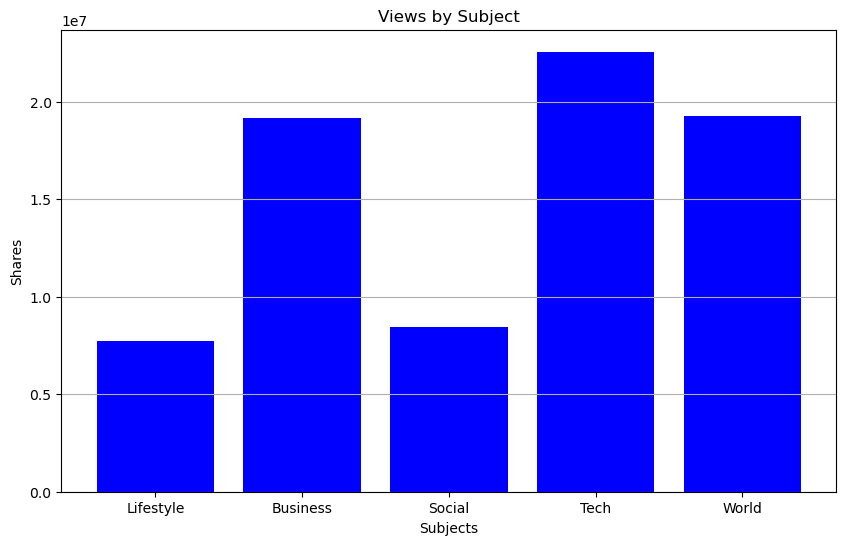

In [179]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(views_by_subject.keys(), views_by_subject.values(), color='blue')  # Create a bar chart
plt.title('Views by Subject')  # Add a title
plt.xlabel('Subjects')  # Label x-axis
plt.ylabel('Shares')  # Label y-axis
plt.grid(axis='y')  # Show grid lines on the y-axis
plt.show()  # Display the plot

In [134]:
#self reference

self_ref = df['self_reference_min_shares']


0          0.000
1          0.000
2          0.000
3          0.000
4          0.000
          ...   
39639    173.125
39640    184.000
39641    168.250
39642     -1.000
39643     23.500
Name: kw_avg_min, Length: 39644, dtype: float64

# Assumptions of a Linear Regression

Step 1 of our model is to check against the assumptions of a linear regression. Here we are checking for independence of observations or autocorrelation by using the 'corr' function. If any of the features have a perfect linear relationship with the target variable we cannot use them in a linear regression. As shown below The only value with a perfect linear relationship is shares to itself which is expected.


In [10]:
print(df.corr()['shares'])

n_tokens_title                   0.008783
n_tokens_content                 0.002459
n_unique_tokens                  0.000806
n_non_stop_words                 0.000443
n_non_stop_unique_tokens         0.000114
num_hrefs                        0.045404
num_self_hrefs                  -0.001900
num_imgs                         0.039388
num_videos                       0.023936
average_token_length            -0.022007
num_keywords                     0.021818
data_channel_is_lifestyle        0.005831
data_channel_is_entertainment   -0.017006
data_channel_is_bus             -0.012376
data_channel_is_socmed           0.005021
data_channel_is_tech            -0.013253
data_channel_is_world           -0.049497
kw_min_min                      -0.001051
kw_max_min                       0.030114
kw_avg_min                       0.030406
kw_min_max                       0.003901
kw_max_max                       0.007863
kw_avg_max                       0.044686
kw_min_avg                       0

# Multicollinearity

Multicollinearity is when there is reduncance among predictor variables. There are two ways to combat this. One is to identify highly correlated variables and remove them. The other is to apply Principle Compent Analysis (PCA) prior to applying the regression. As shown in the correlation grid below there are highly correlated variables (up to .999) which must be addressed. 

In [182]:
df.corr()

n_tokens_title  n_tokens_content  \
n_tokens_title                       1.000000          0.018160   
n_tokens_content                     0.018160          1.000000   
n_unique_tokens                     -0.005318         -0.004737   
n_non_stop_words                    -0.004754          0.017512   
n_non_stop_unique_tokens            -0.005420          0.000373   
...                                       ...               ...   
sum_data_channel_is_lifestyle       -0.027280          0.032766   
sum_data_channel_is_bus             -0.000130          0.009068   
sum_data_channel_is_socmed          -0.049974          0.029477   
sum_data_channel_is_tech            -0.015073          0.038049   
sum_data_channel_is_world            0.033731          0.009875   

                               n_unique_tokens  n_non_stop_words  \
n_tokens_title                       -0.005318         -0.004754   
n_tokens_content                     -0.004737          0.017512   
n_unique_tokens                       1.000000          0.999572   
n_non_stop_words                      0.999572          1.000000   
n_non_stop_unique_tokens              0.999852          0.999532   
...                                        ...               ...   
sum_data_channel_is_lifestyle        -0.000811         -0.000233   
sum_data_channel_is_bus              -0.000048          0.000006   
sum_data_channel_is_socmed           -0.001091         -0.000026   
sum_data_channel_is_tech             -0.001353         -0.000006   
sum_data_channel_is_world            -0.002025         -0.001436   

                               n_non_stop_unique_tokens  num_hrefs  \
n_tokens_title                                -0.005420  -0.053496   
n_tokens_content                               0.000373   0.423065   
n_unique_tokens                                0.999852  -0.004352   
n_non_stop_words                               0.999532   0.005521   
n_non_stop_unique_tokens                       1.000000  -0.004983   
...                                                 ...        ...   
sum_data_channel_is_lifestyle                 -0.000261   0.031425   
sum_data_channel_is_bus                        0.000389   0.001067   
sum_data_channel_is_socmed                    -0.000786   0.021475   
sum_data_channel_is_tech                      -0.000865   0.005992   
sum_data_channel_is_world                     -0.001768   0.001411   

                               num_self_hrefs  num_imgs  num_videos  \
n_tokens_title                      -0.014856 -0.008858    0.051460   
n_tokens_content                     0.304682  0.342600    0.103699   
n_unique_tokens                      0.006620  0.018802   -0.000597   
n_non_stop_words                     0.013598  0.028486   -0.000899   
n_non_stop_unique_tokens             0.007584  0.014230   -0.000963   
...                                       ...       ...         ...   
sum_data_channel_is_lifestyle       -0.020438  0.014553   -0.007880   
sum_data_channel_is_bus             -0.005075 -0.021654    0.004514   
sum_data_channel_is_socmed           0.041854 -0.011109   -0.001376   
sum_data_channel_is_tech             0.047758  0.001012   -0.022096   
sum_data_channel_is_world           -0.037604 -0.011612   -0.022531   

                               average_token_length  ...  \
n_tokens_title                            -0.071403  ...   
n_tokens_content                           0.167789  ...   
n_unique_tokens                            0.026407  ...   
n_non_stop_words                           0.031554  ...   
n_non_stop_unique_tokens                   0.034185  ...   
...                                             ...  ...   
sum_data_channel_is_lifestyle             -0.000016  ...   
sum_data_channel_is_bus                    0.008337  ...   
sum_data_channel_is_socmed                 0.011782  ...   
sum_data_channel_is_tech                   0.005419  ...   
sum_data_channel_is_world                 -0.001841  ..

In [157]:
week_columns = ['weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday','weekday_is_friday', 'weekday_is_saturday','weekday_is_sunday']

df_weekanalysis = df.drop('is_weekend', axis= 'columns')

df_weekendanalysis = df.drop(week_columns, axis='columns')


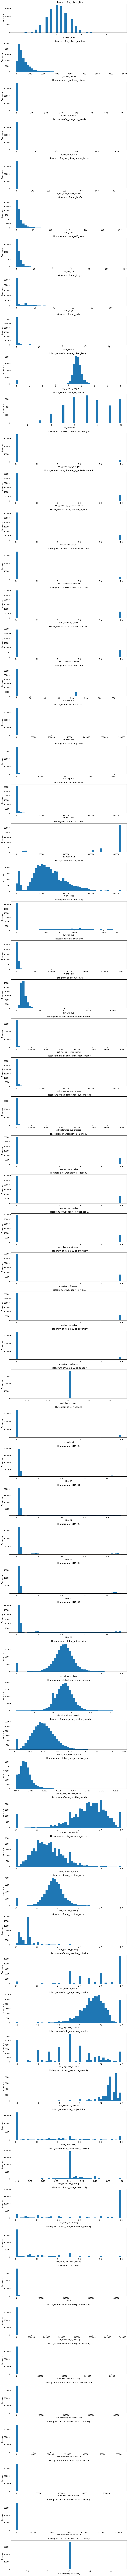

In [451]:


num_columns = df_filter.select_dtypes(include='number').columns
num_plots = len(num_columns)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 3))

for i, col in enumerate(num_columns):
    df_filter[col].plot(kind='hist', bins=50, ax=axes[i], title=f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

It is standard practice to Scale your data (even though most of the data is already scaled there are values that aren't))

In [370]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filter.drop(['shares','sum_weekday_is_monday','sum_weekday_is_tuesday','sum_weekday_is_wednesday','sum_weekday_is_thursday','sum_weekday_is_friday',
                        'sum_weekday_is_saturday','sum_weekday_is_sunday'], axis = 'columns'))

In [371]:
pca = PCA()
pca.fit(scaled_data)


PCA()

In [372]:
expl_var = pca.explained_variance_ratio_
df_expl_var = pd.DataFrame(
    data=zip(range(1, len(expl_var) + 1), expl_var, expl_var.cumsum()), 
    columns=['PCA', 'Explained Variance (%)', 'Total Explained Variance (%)']
    ).set_index('PCA').mul(100).round(1)
print(df_expl_var)

     Explained Variance (%)  Total Explained Variance (%)
PCA                                                      
1                       8.4                           8.4
2                       7.0                          15.4
3                       6.3                          21.8
4                       5.3                          27.0
5                       4.8                          31.8
6                       4.5                          36.3
7                       4.3                          40.6
8                       4.0                          44.5
9                       3.7                          48.2
10                      3.6                          51.8
11                      3.5                          55.3
12                      3.3                          58.6
13                      2.8                          61.5
14                      2.4                          63.9
15                      2.4                          66.3
16            

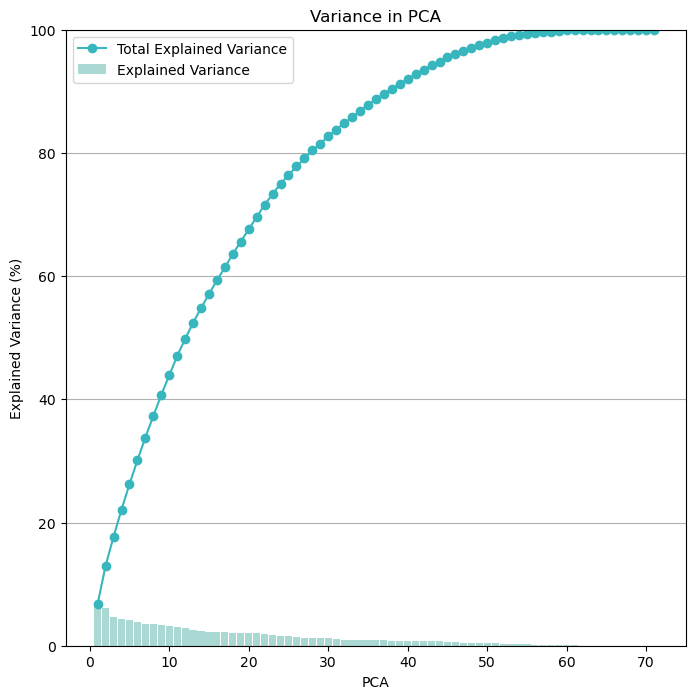

In [315]:
fig, ax = plt.subplots(figsize=(8,8))
ax.bar(x=df_expl_var.index, height=df_expl_var['Explained Variance (%)'], label='Explained Variance', width=0.9, color='#AAD8D3')
ax.plot(df_expl_var['Total Explained Variance (%)'], label='Total Explained Variance', marker='o', c='#37B6BD')

plt.ylim(0, 100)
plt.ylabel('Explained Variance (%)')
plt.xlabel('PCA')
plt.grid(True, axis='y')
plt.title('Variance in PCA')
plt.legend()

Next let's fit the PCA model

In [390]:
pca = PCA(22)
X_r = pca.fit_transform(scaled_data)

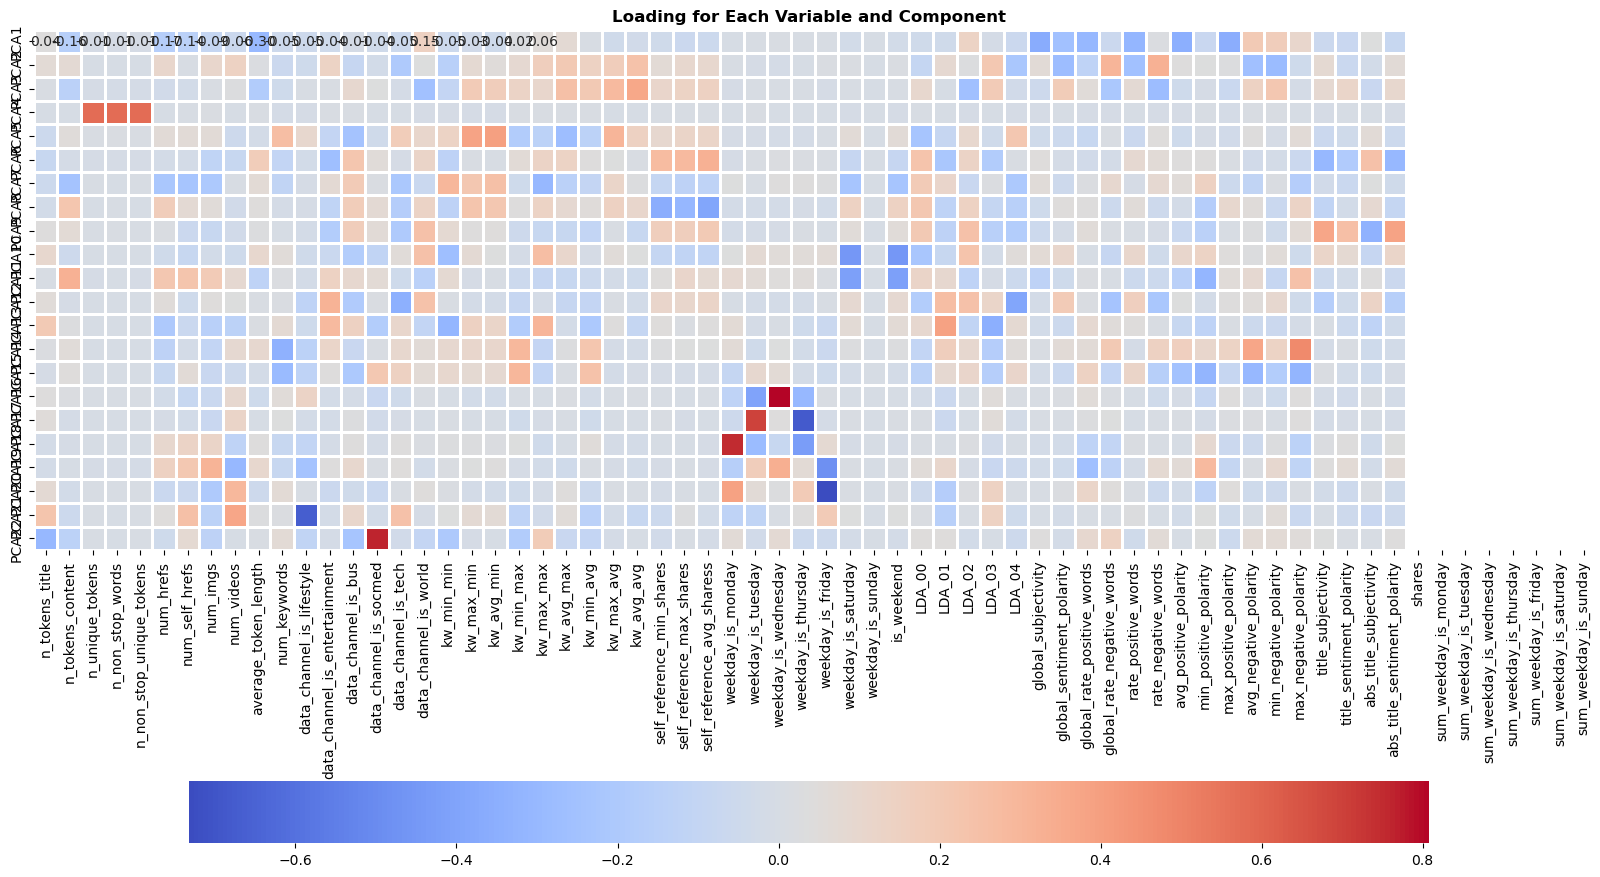

In [391]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(
    pca.components_,
    cmap='coolwarm',
    yticklabels=[f'PCA{x}' for x in range(1,pca.n_components_+1)],
    xticklabels=list(df.columns),
    linewidths=1,
    annot=True,
    fmt=',.2f',
    cbar_kws={"shrink": 0.8, "orientation": 'horizontal'}
    )

ax.set_aspect("equal")
plt.title('Loading for Each Variable and Component', weight='bold')
plt.show()

# Linear Regression

In [418]:
from sklearn.model_selection import train_test_split

In [419]:
df_filter.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [420]:
new_X = df_filter.drop(['shares','sum_weekday_is_monday','sum_weekday_is_tuesday','sum_weekday_is_wednesday','sum_weekday_is_thursday','sum_weekday_is_friday',
                        'sum_weekday_is_saturday','sum_weekday_is_sunday'], axis = 'columns')
new_y = df_filter['shares']

In [421]:
new_y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 36907, dtype: int64

In [422]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 0)

In [423]:
pca = PCA(22)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

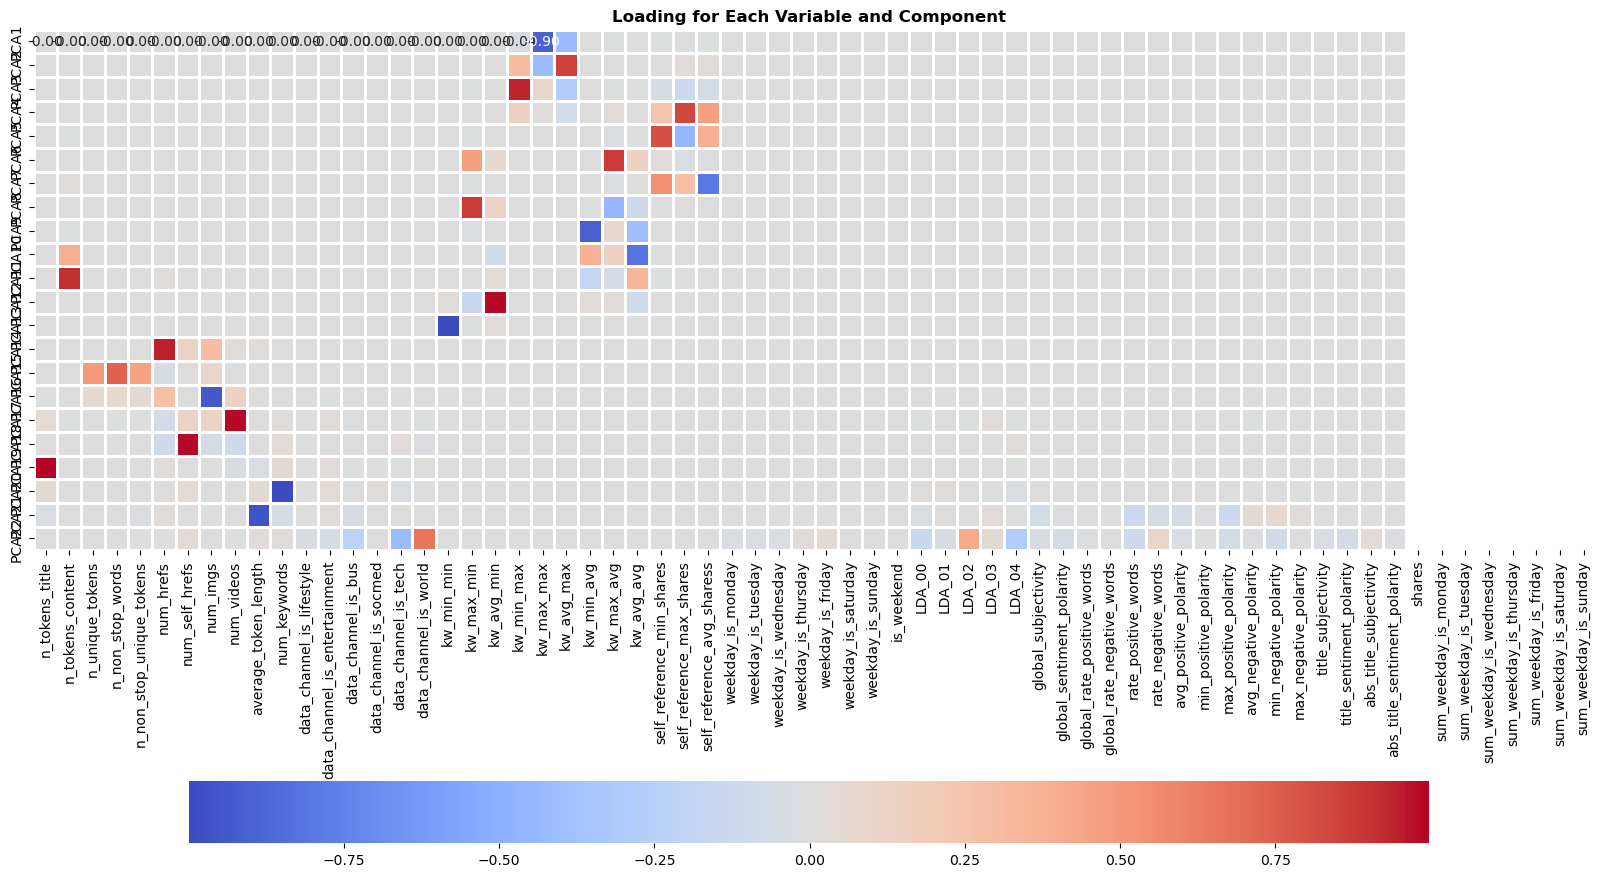

In [424]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(
    pca.components_,
    cmap='coolwarm',
    yticklabels=[f'PCA{x}' for x in range(1,pca.n_components_+1)],
    xticklabels=list(df.columns),
    linewidths=1,
    annot=True,
    fmt=',.2f',
    cbar_kws={"shrink": 0.8, "orientation": 'horizontal'}
    )

ax.set_aspect("equal")
plt.title('Loading for Each Variable and Component', weight='bold')
plt.show()

In [425]:
from sklearn.linear_model import LinearRegression  

classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [426]:
y_pred = classifier.predict(X_test)

In [427]:
np.array(y_test)

array([1400,  112,  604, ...,  740,  676, 1900], dtype=int64)

In [428]:
y_pred.reshape(-1,1)

array([[1579.30668143],
       [4482.6952629 ],
       [2131.57592662],
       ...,
       [2550.53762137],
       [4682.28734942],
       [2941.92243882]])

In [429]:
classifier.coef_

array([-8.78950268e-04,  5.07147388e-03, -8.34134842e-03,  1.27677017e-02,
        2.32089460e-02,  5.79907492e-02,  2.78690832e-02, -9.92047473e-02,
       -3.84463435e-01, -1.77253325e+00,  1.28643924e+00, -1.14059937e+00,
       -4.23752014e+00,  2.58363261e+01,  2.08178721e+00, -8.54348965e+00,
        9.85389916e-01, -6.54844789e+01,  6.79108733e+01, -1.06004269e+02,
        1.05976603e+02, -2.36985126e+02])

In [430]:
len(y_pred)

7382

In [431]:
np.array(y_test)

array([1400,  112,  604, ...,  740,  676, 1900], dtype=int64)

In [432]:
classifier.score(X_test, y_test)

0.022699158426069177

In [433]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [434]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 3083.40
MSE: 125202540.12
RMSE: 11189.39
R²: 0.02


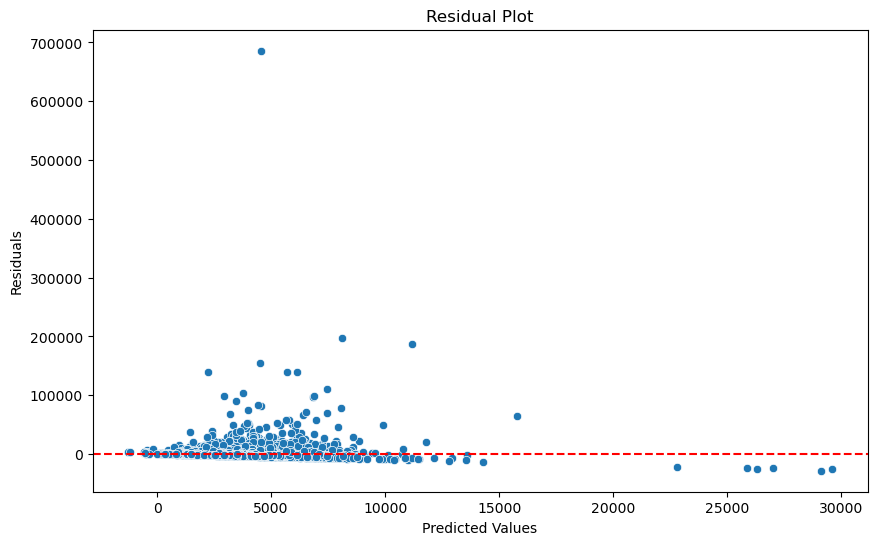

In [435]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


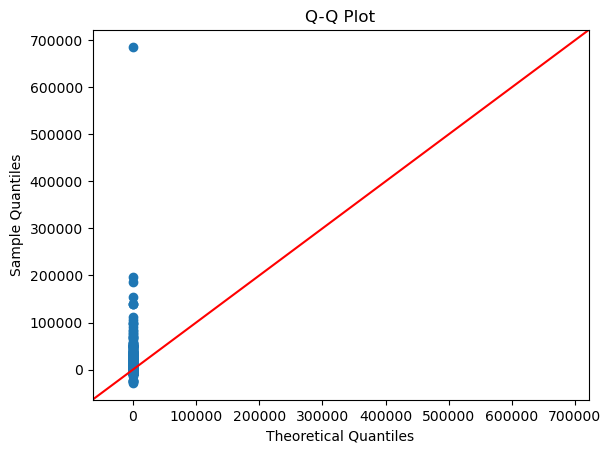

In [386]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()



In [387]:
y_test

34419    1400
7274      112
18536     604
37757     896
33911    6500
         ... 
22384    3800
35011     809
12839     740
3125      676
25755    1900
Name: shares, Length: 7382, dtype: int64

# Model without PCA for comparison

In [392]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size = 0.2, random_state = 0)

In [394]:
classifier = LinearRegression()
classifier.fit(X_train, y_train)

LinearRegression()

In [395]:
y_pred = classifier.predict(X_test)

In [396]:
classifier.score(X_test, y_test)

0.024872404805847514

In [397]:
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 3083.40
MSE: 125202552.31
RMSE: 11189.39
R²: 0.02


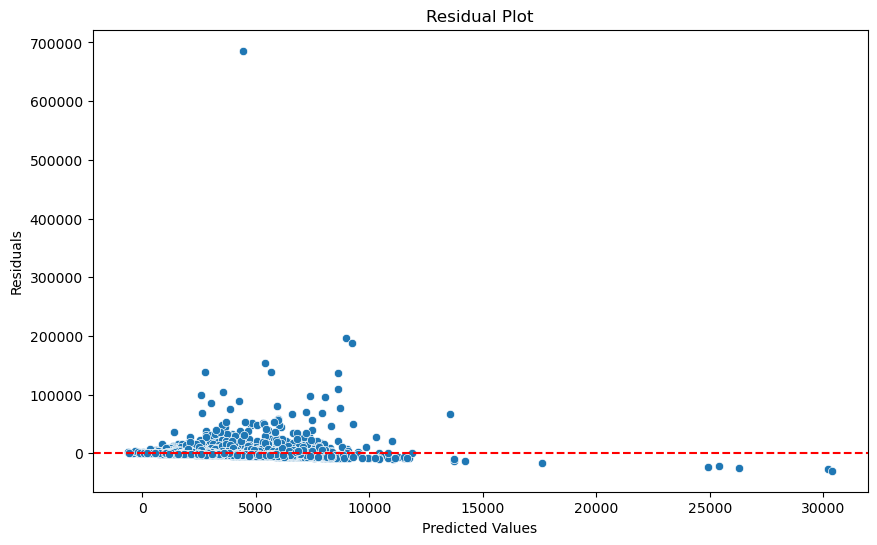

In [399]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
